In [38]:
import platform
from pathlib import Path
from datetime import datetime, timedelta
import datajoint as dj
dj.blob.use_32bit_dims = True # necessary for pd.blob read


from create_trials_df import create_trials_df_from_dj
from create_days_df import create_days_df_from_dj, lazy_load_days_summary_df

from plot_trials_info import *
from multiplot_summaries import *

import plot_utils as pu
import dj_utils as dju
import dir_utils as du
FIGURES_PATH = du.get_figures_path("rats", "cohort3")

# settings
%load_ext autoreload
%autoreload 2
sns.set_context("talk")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
# ANIMALS
ANIMAL_IDS = [
    "R030",
    "R031",
    "R032",
    "R033",
    "R034",
    "R035",
    "R036",
    "R037",
    "R038",
    "R039",
]
mode = "yesterday"

if mode == "today":
    date = datetime.today().date()
    latest_date = None
elif mode == "yesterday":
    date = datetime.today().date() - timedelta(days=1)
    latest_date = date.strftime("%Y-%m-%d")

# DATES
date_min, date_max = dju.return_date_window(latest_date=latest_date, n_days_back=20)

In [40]:
# LOAD IN TRIALS DATA
trials_df = create_trials_df_from_dj(animal_ids=ANIMAL_IDS, date_min=date_min)

[2024-01-21 14:25:36,301][WARNING]: MySQL server has gone away. Reconnecting to the server.


fetched 16 sessions for R030 between 2024-01-03 and 2024-01-20
fetched 17 sessions for R031 between 2024-01-03 and 2024-01-20
fetched 17 sessions for R032 between 2024-01-03 and 2024-01-20
fetched 17 sessions for R033 between 2024-01-03 and 2024-01-20
fetched 17 sessions for R034 between 2024-01-03 and 2024-01-20
fetched 16 sessions for R035 between 2024-01-03 and 2024-01-20
Not all variables are the same length. Cannot create proper DataFrame
result: 403
hits: 403
violations: 403
temperror: 403
hit_rate: 403
error_rate: 403
violation_rate: 403
temp_error_rate: 403
n_lpokes: 403
n_cpokes: 403
n_rpokes: 403
trial_dur: 403
trial_start: 403
valid_early_spoke: 403
first_spoke: 403
first_lpoke: 403
first_rpoke: 403
n_settling_ins: 403
avg_settling_in: 403
cpoke_dur: 403
wf_cpoke_dur: 0
n_incorr_spokes_during_give_del: 403
stage: 403
curriculum: 403
sides: 403
SMA_set: 403
is_match: 403
sa: 403
sb: 403
stimuli_on: 403
settling_in_dur: 403
legal_cbreak_dur: 403
pre_dur: 403
adj_pre_dur: 403
s

In [41]:
date_min

'2023-12-31'

In [42]:
# LOAD IN DAYS DATA
# days_df = create_days_df_from_dj(
#     animal_ids=ANIMAL_IDS, date_min=date_min, date_max=date_max
# )
f_name = "R3s_days_df.csv"

# days_df.to_csv(du.DATA_PATH / f_name, index=False)


days_df = lazy_load_days_summary_df(
    date_min="2024-01-04",
    date_max=date_max,
    animal_ids=ANIMAL_IDS,
    save_dir=du.DATA_PATH,
    f_name=f_name,
    save_out=True,
)

# days_df = pd.read_csv(du.DATA_PATH / f_name)

partial dj load with new date min 2024-01-04 -> 2024-01-19
Returning appended df with entries between 2024-01-04 and 2024-01-20
Saved out appended df to C:\Users\JB\github\jbreda_animal_training\data\days_dfs\R3s_days_df.csv


R030
R031
R032
R033


c:\Users\JB\github\jbreda_animal_training\code\training_performance\plot_days_info.py:980: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


R034
R035
R036
R037
R038
R039


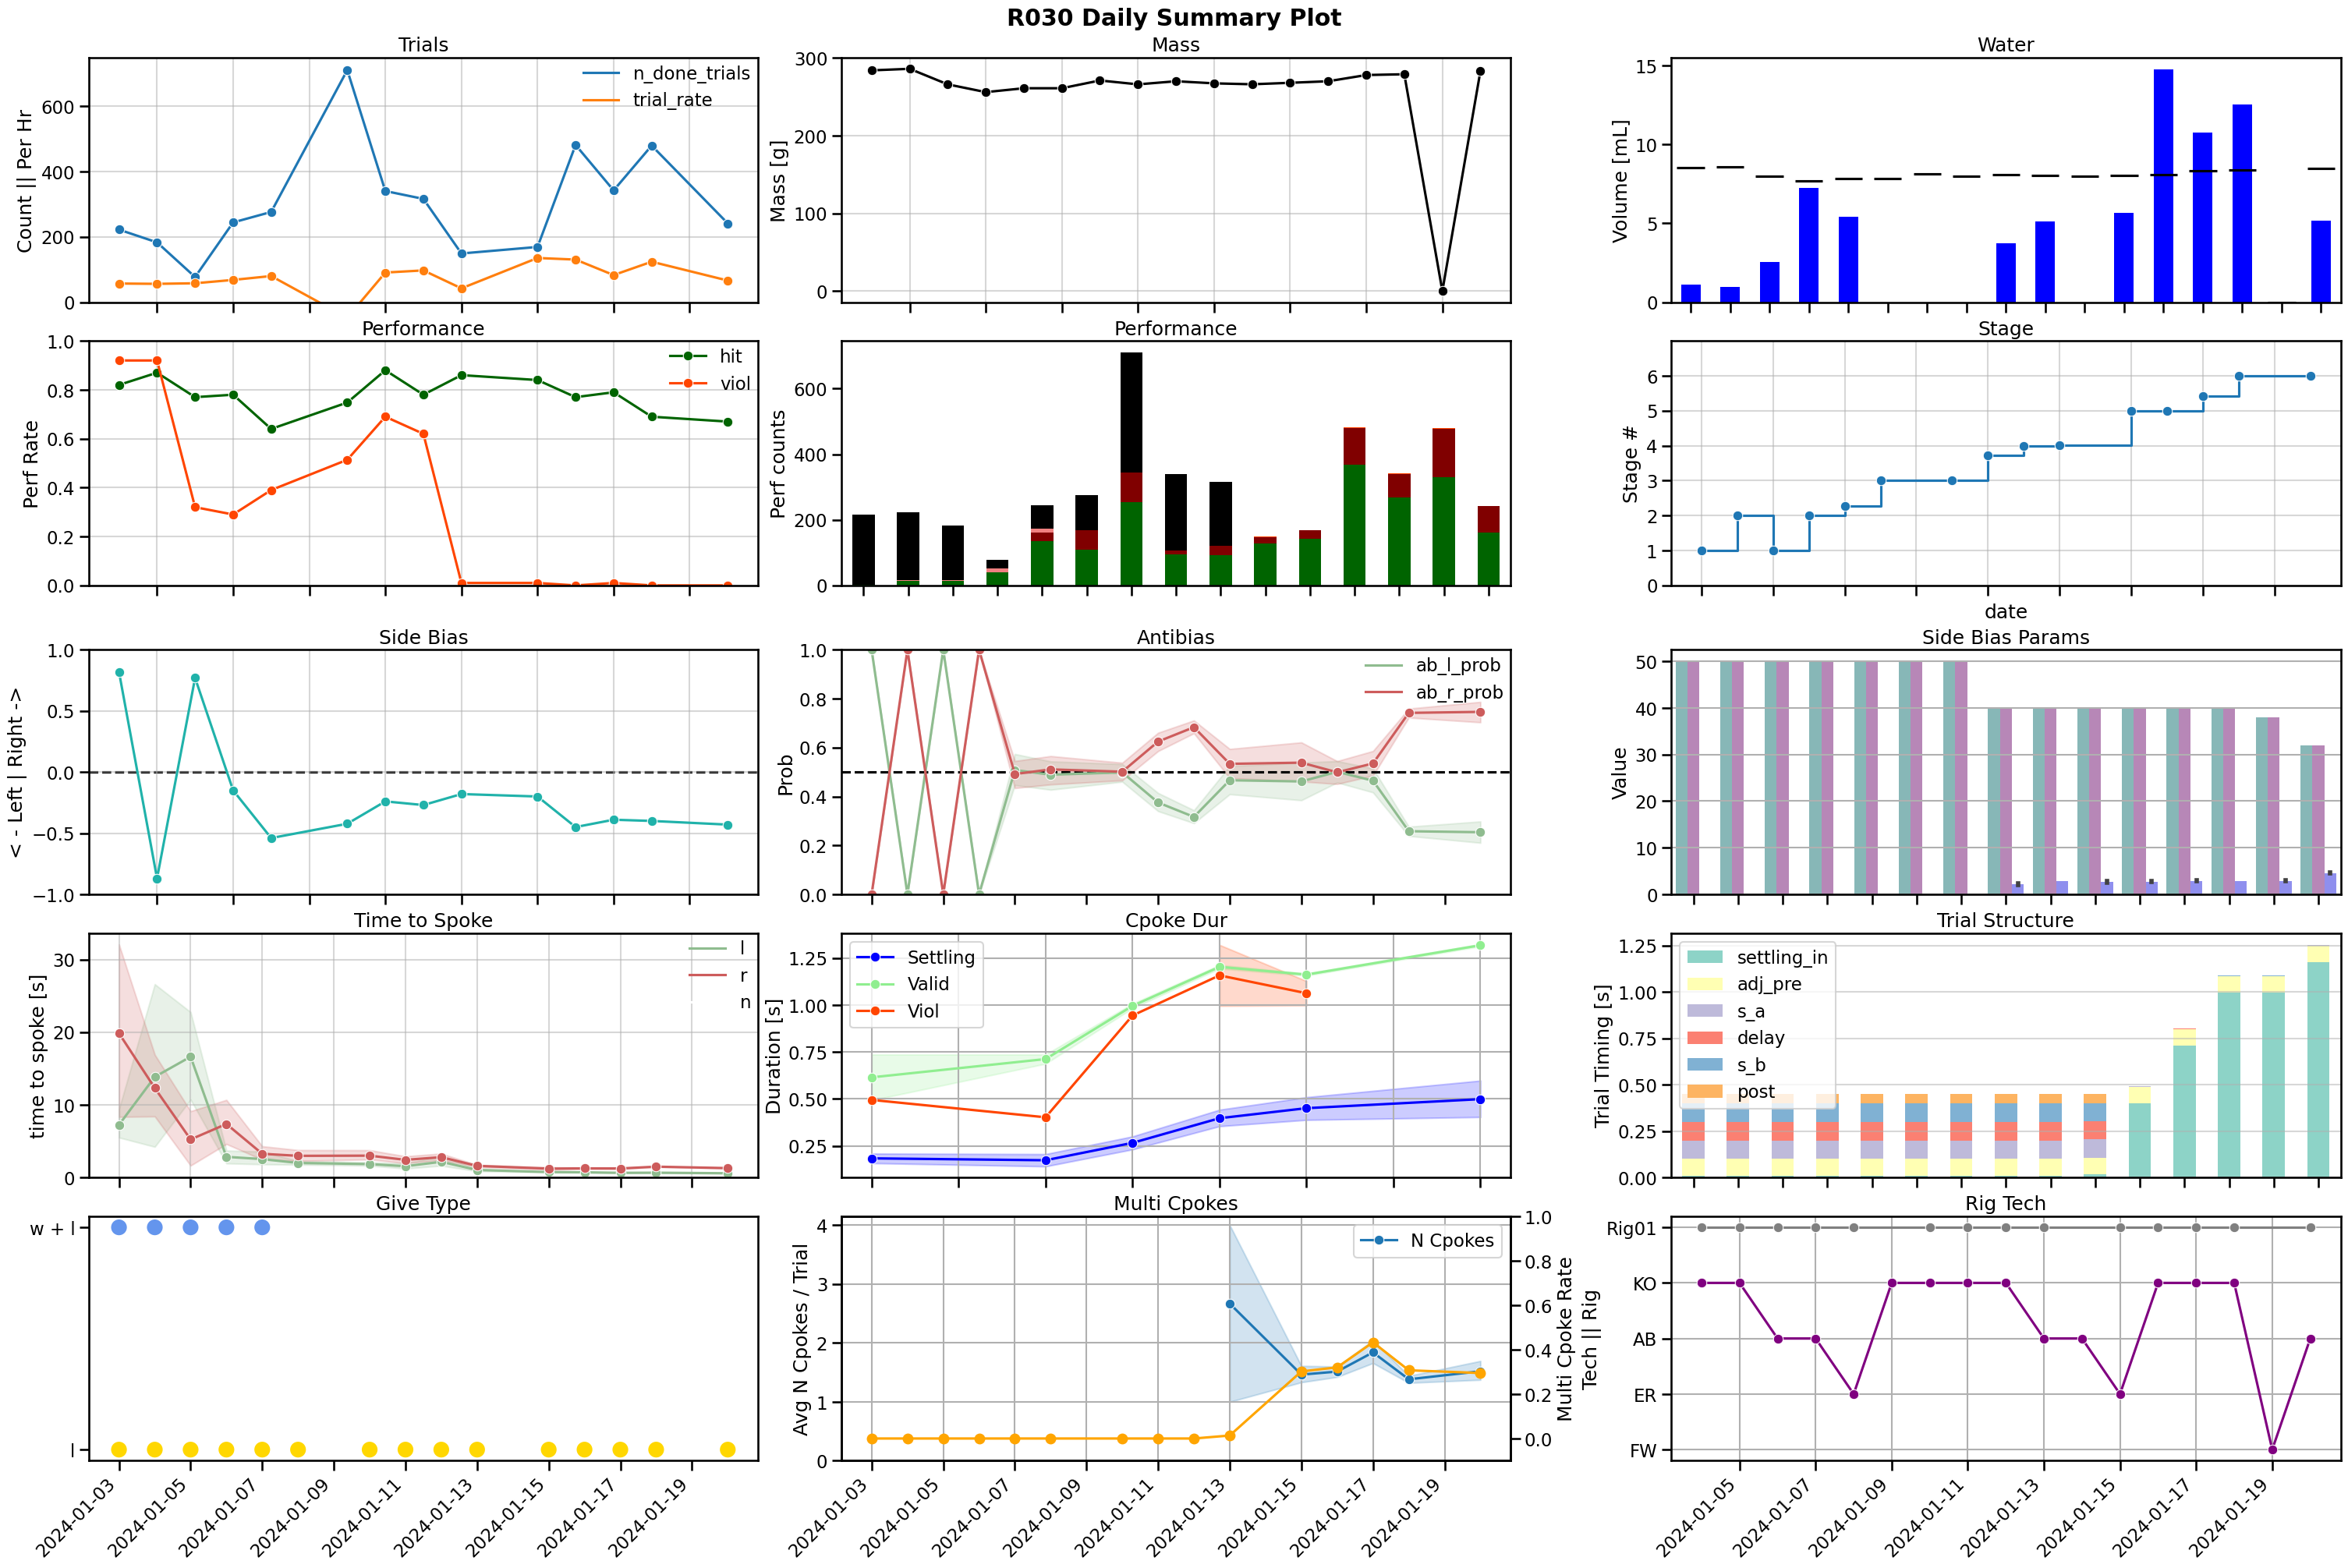

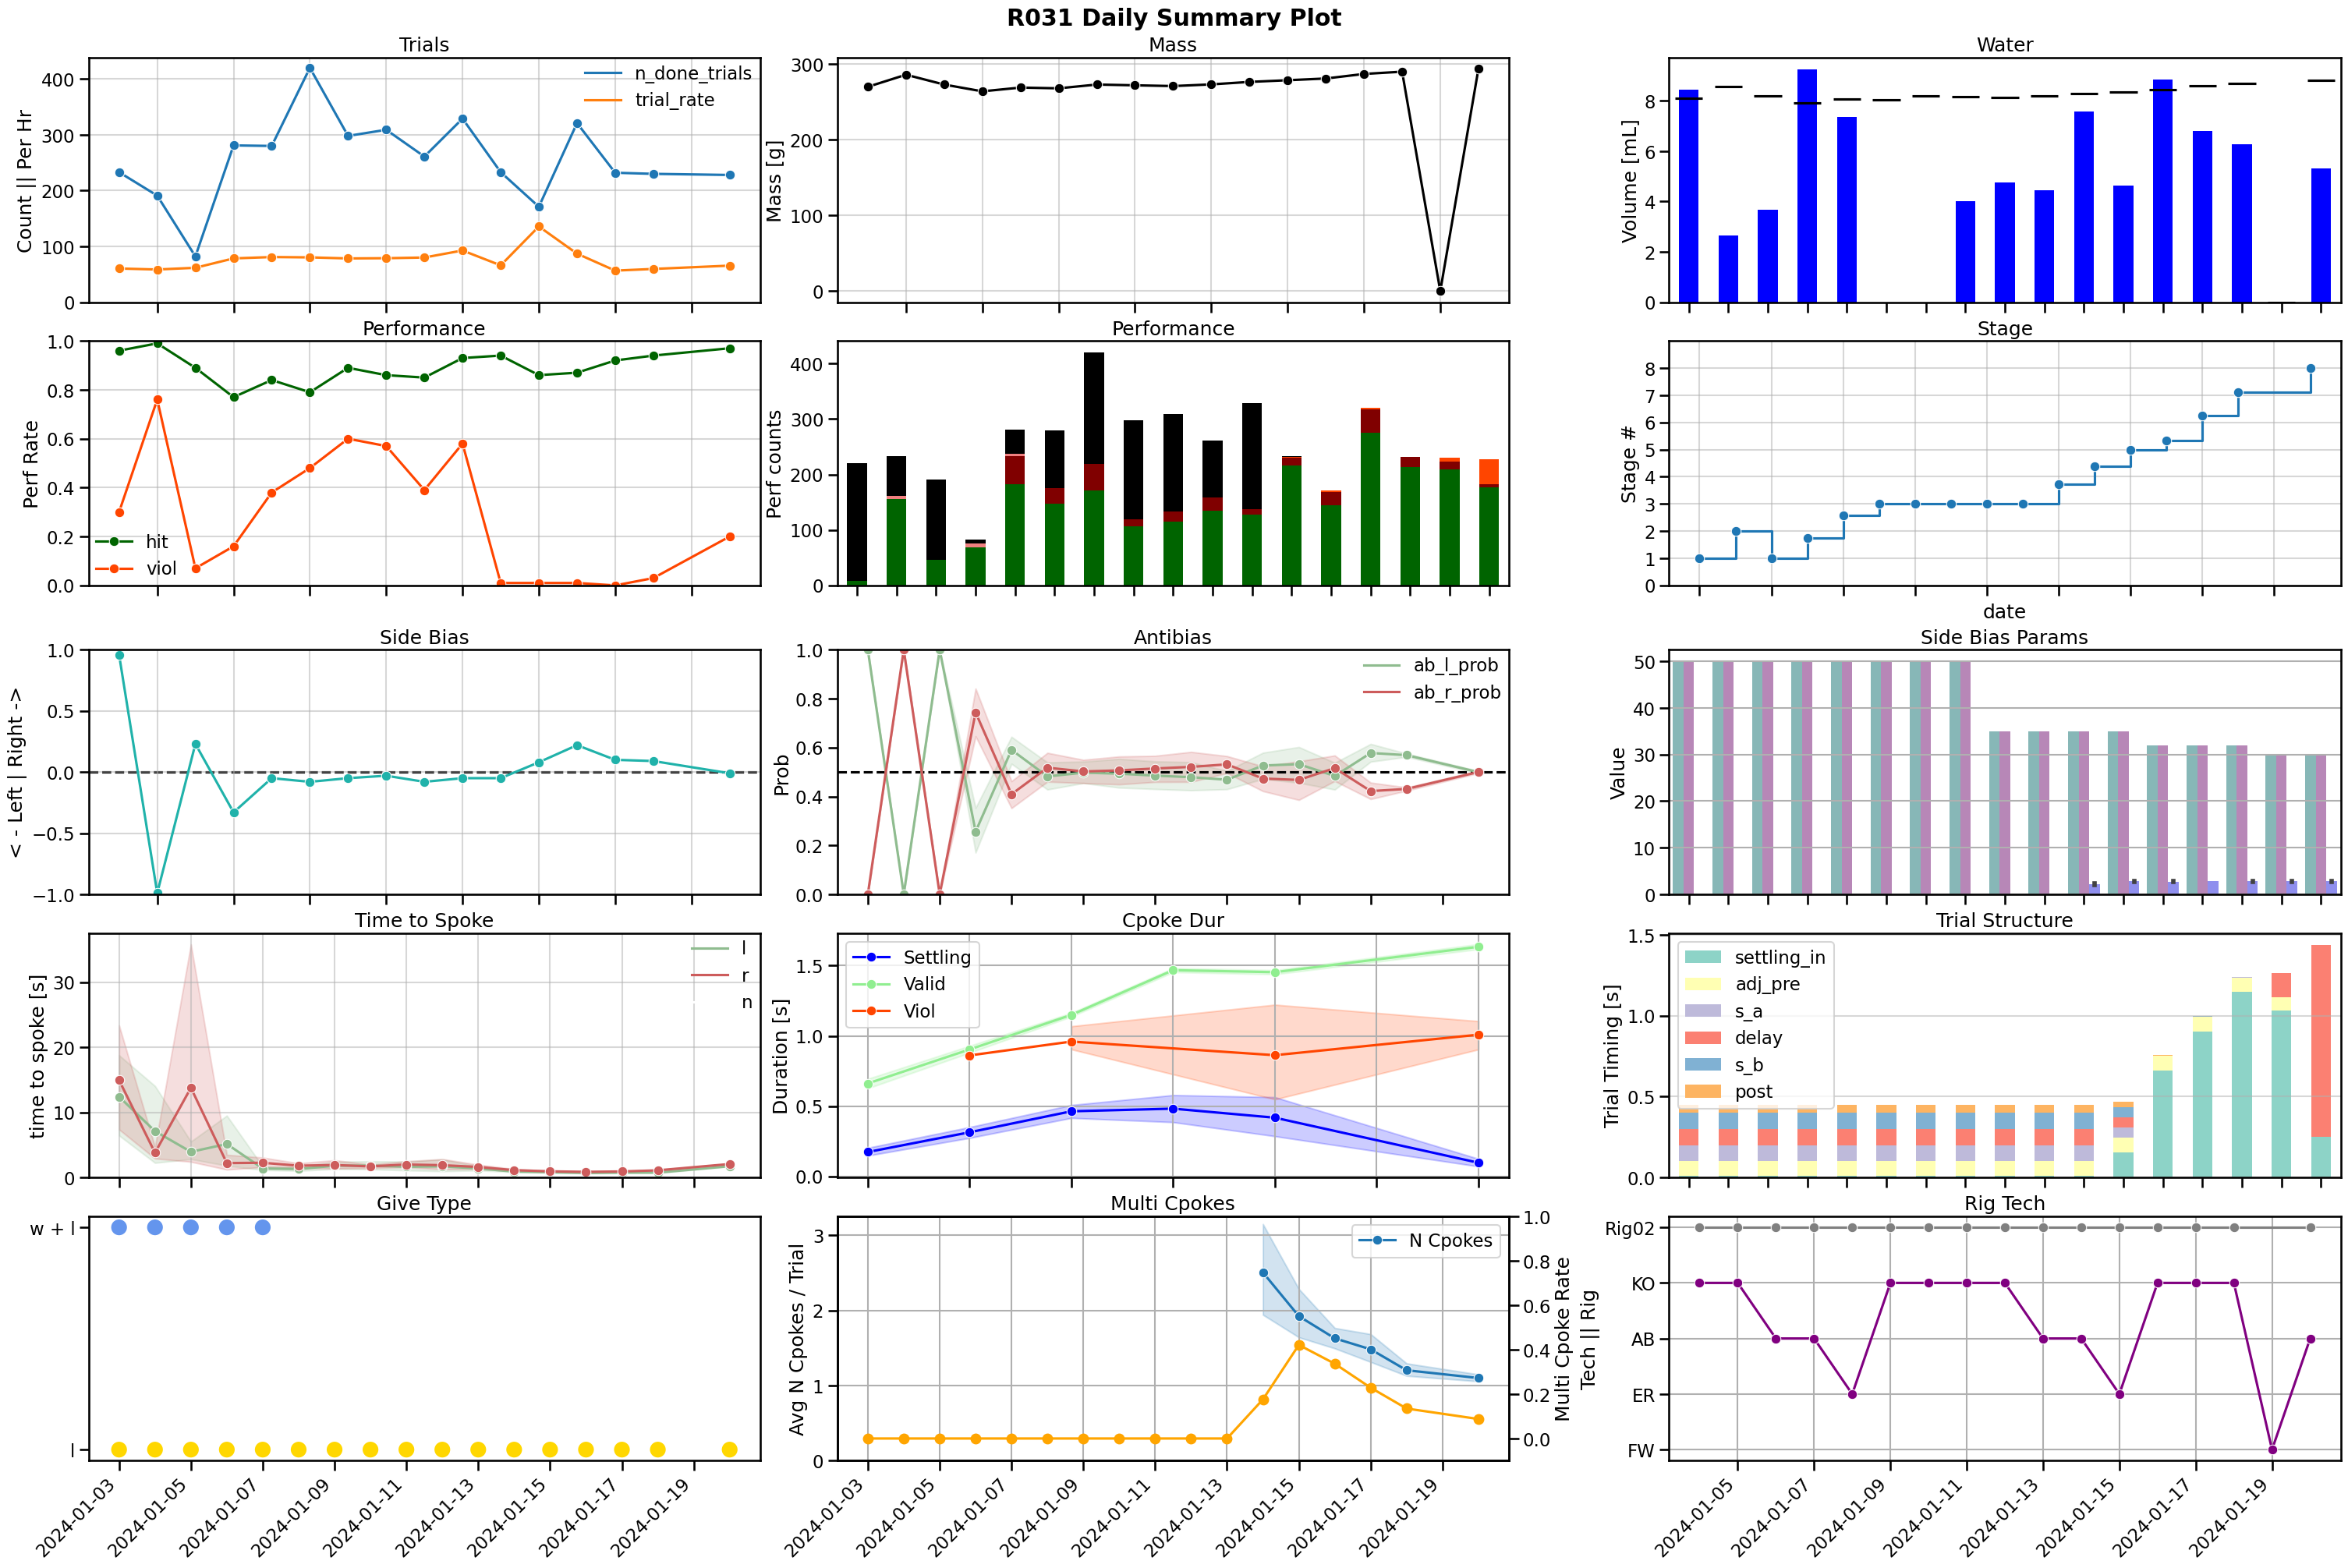

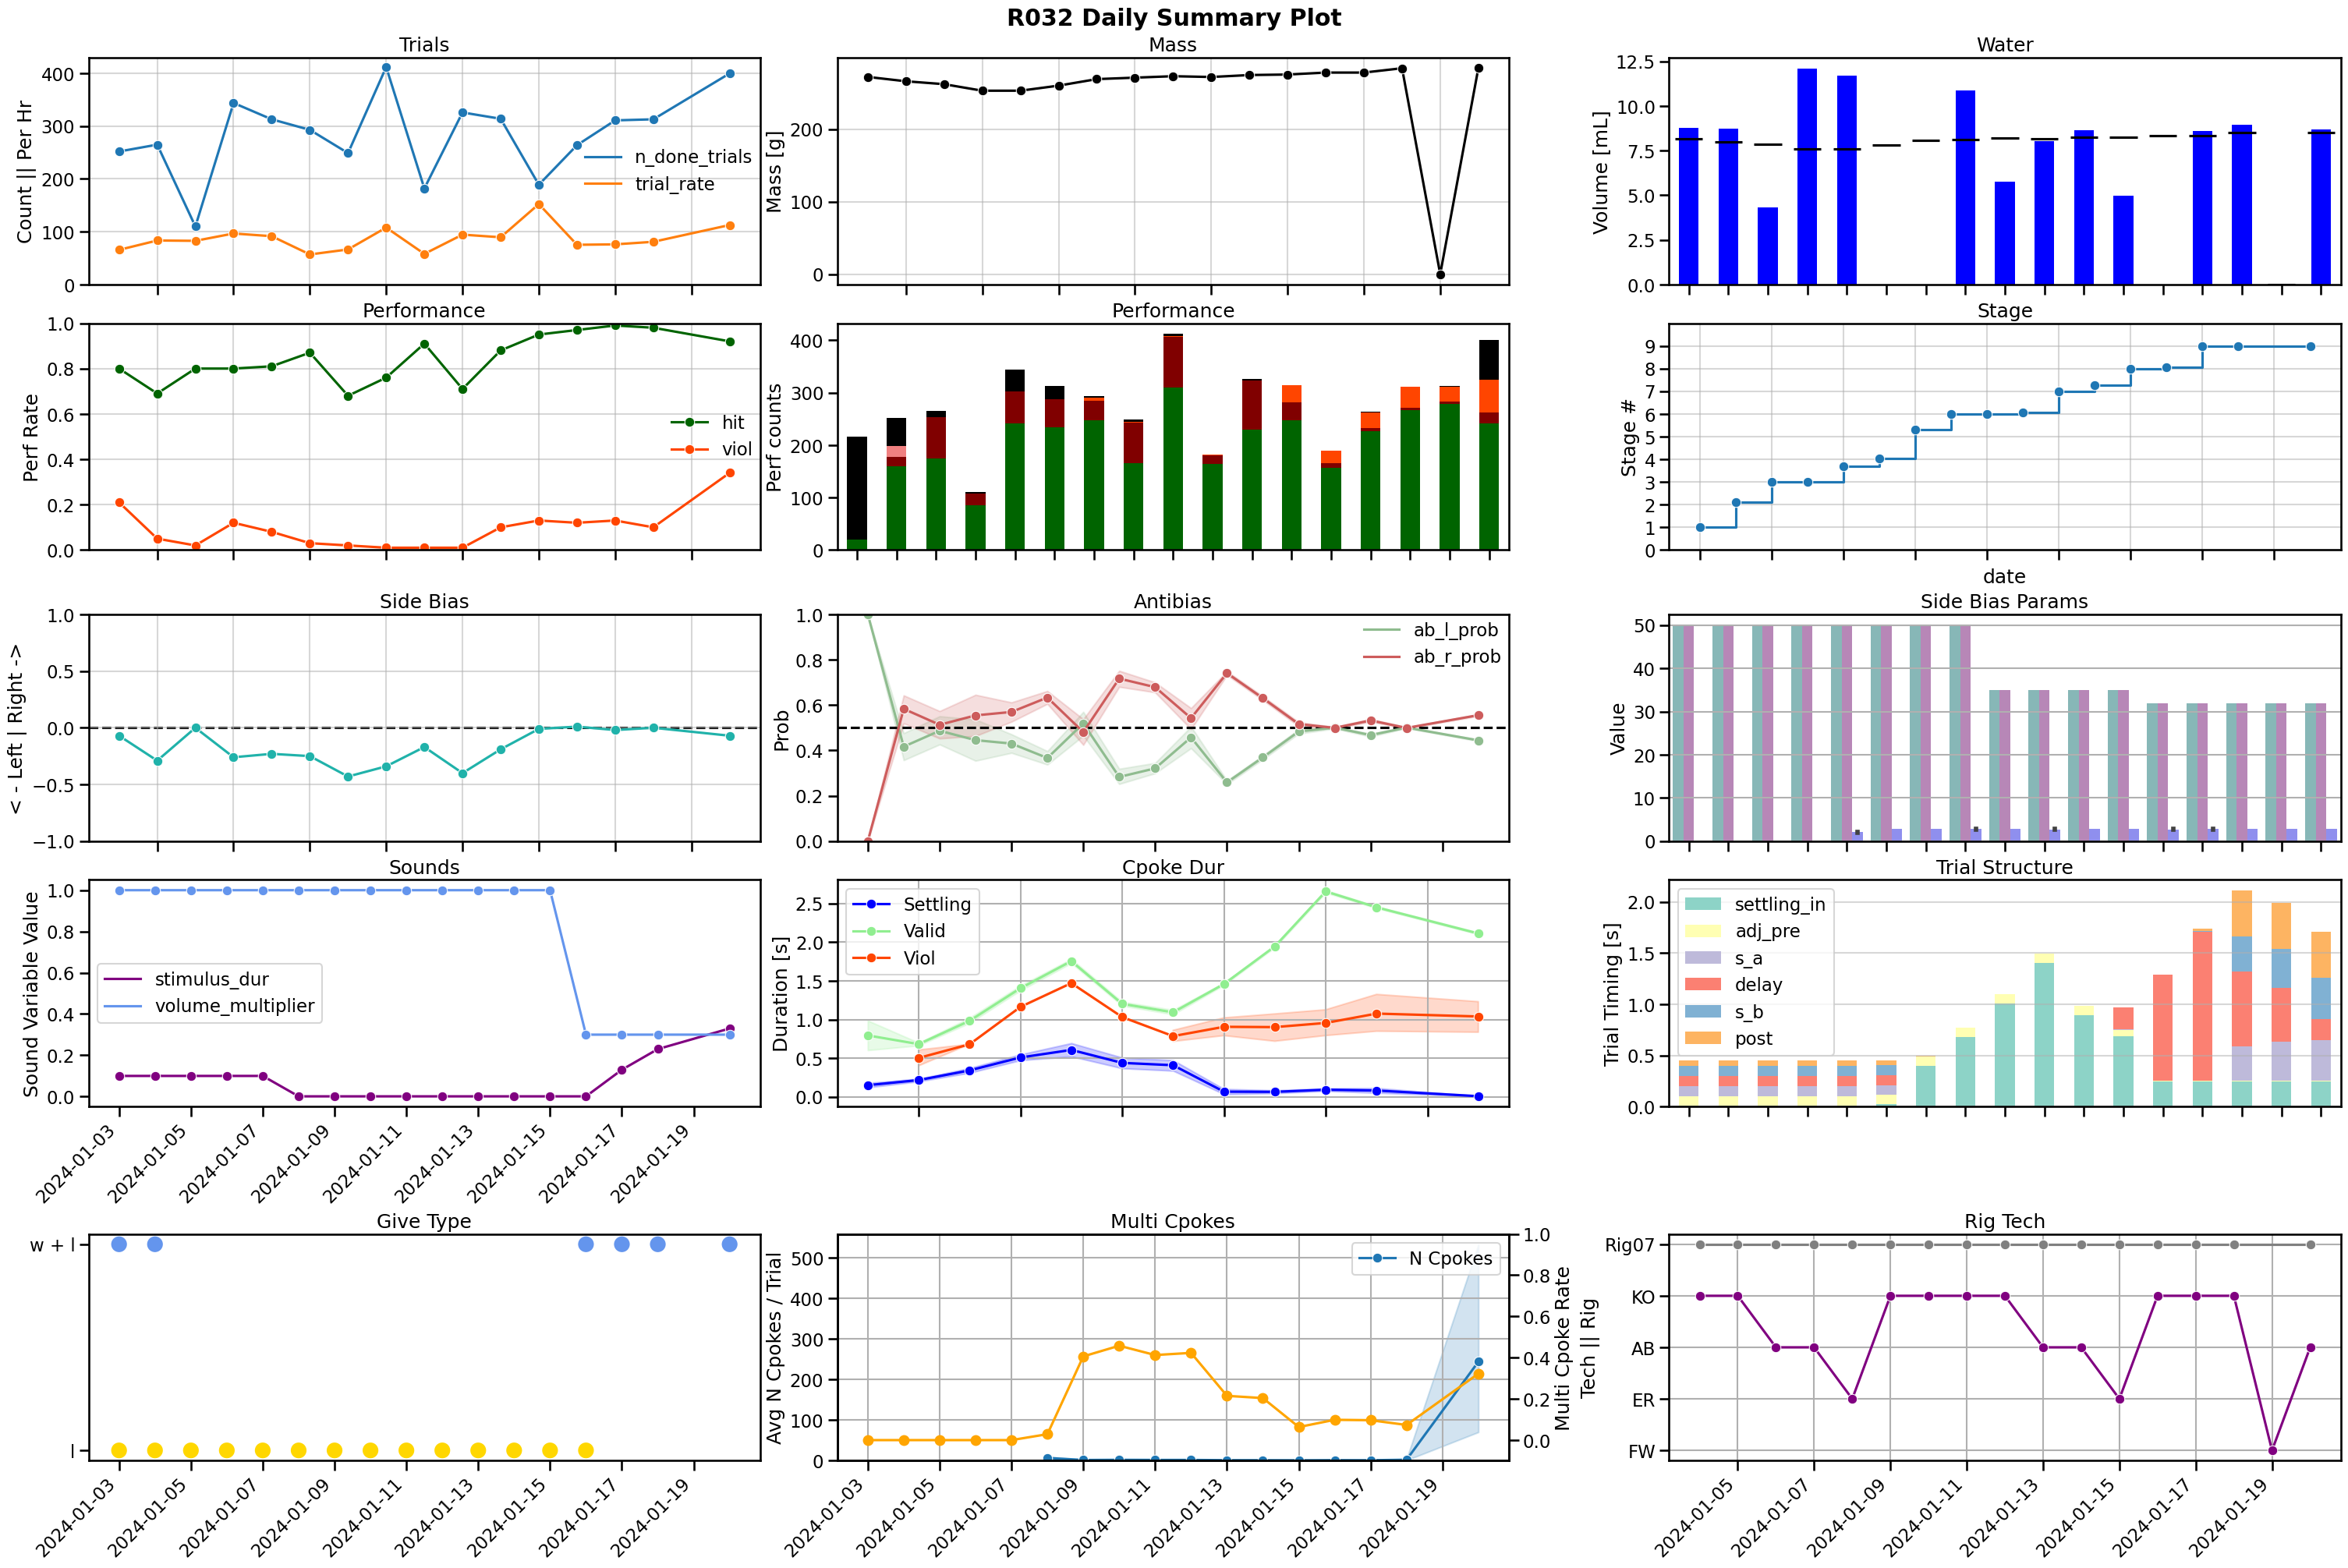

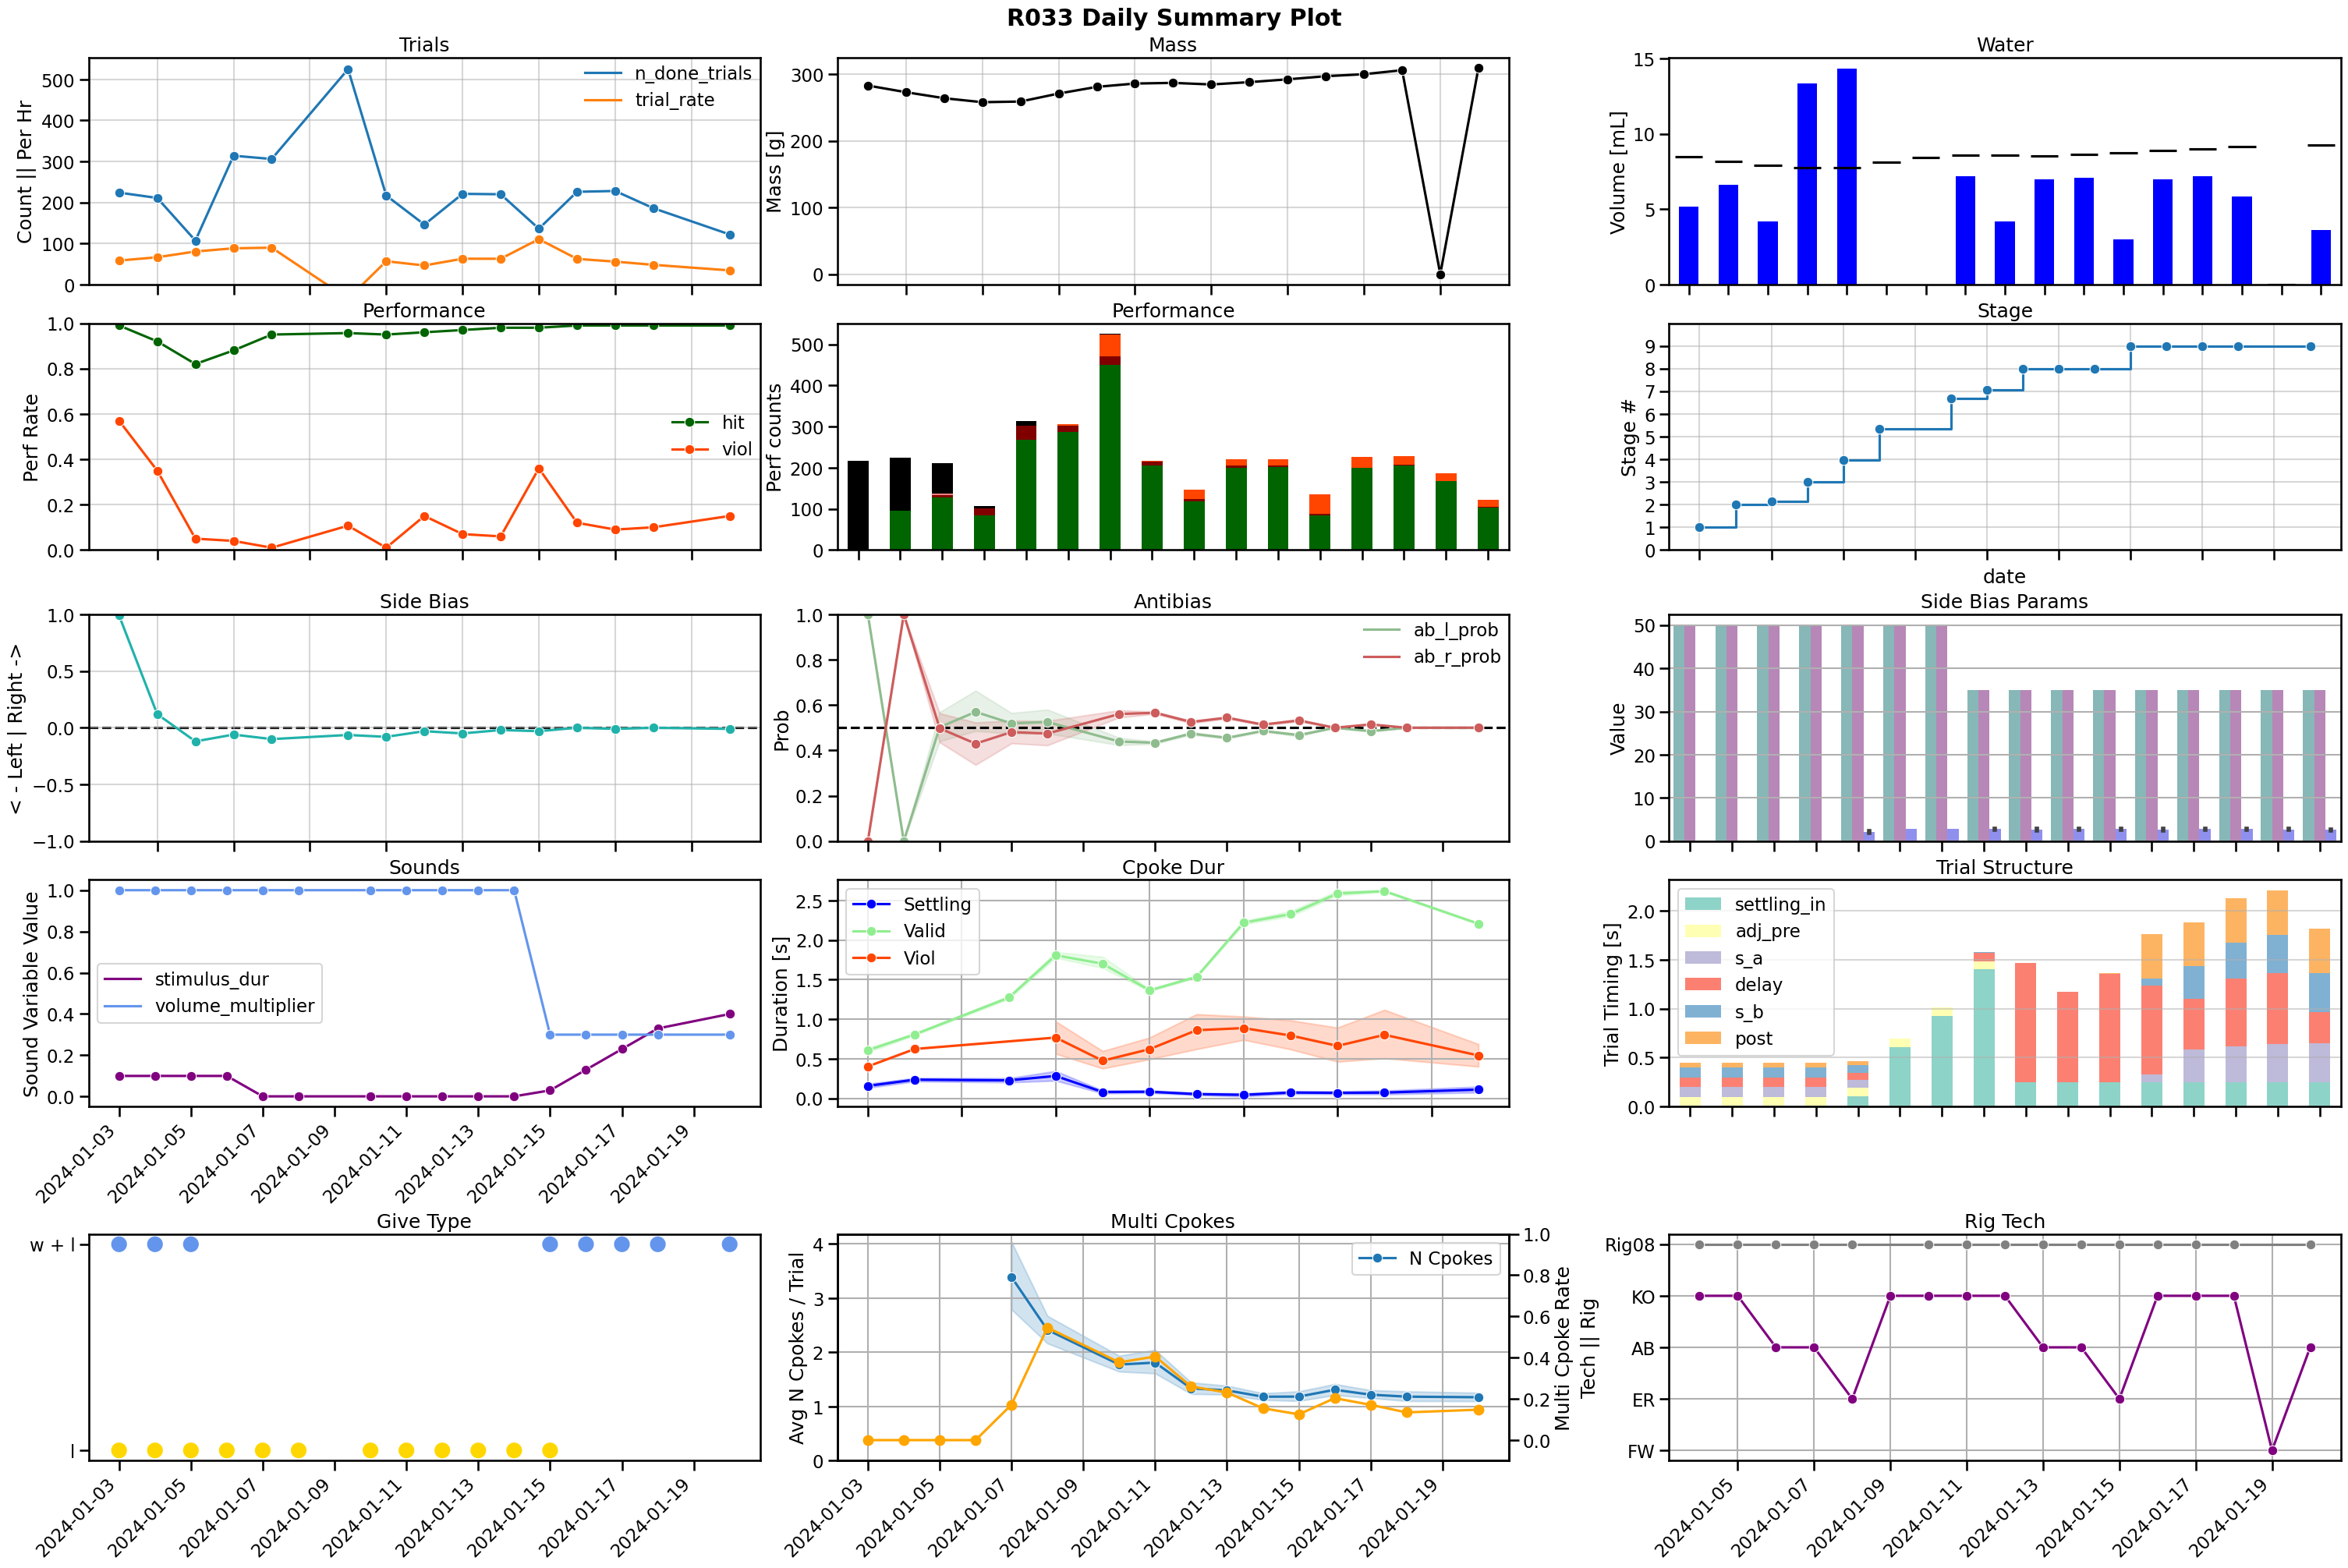

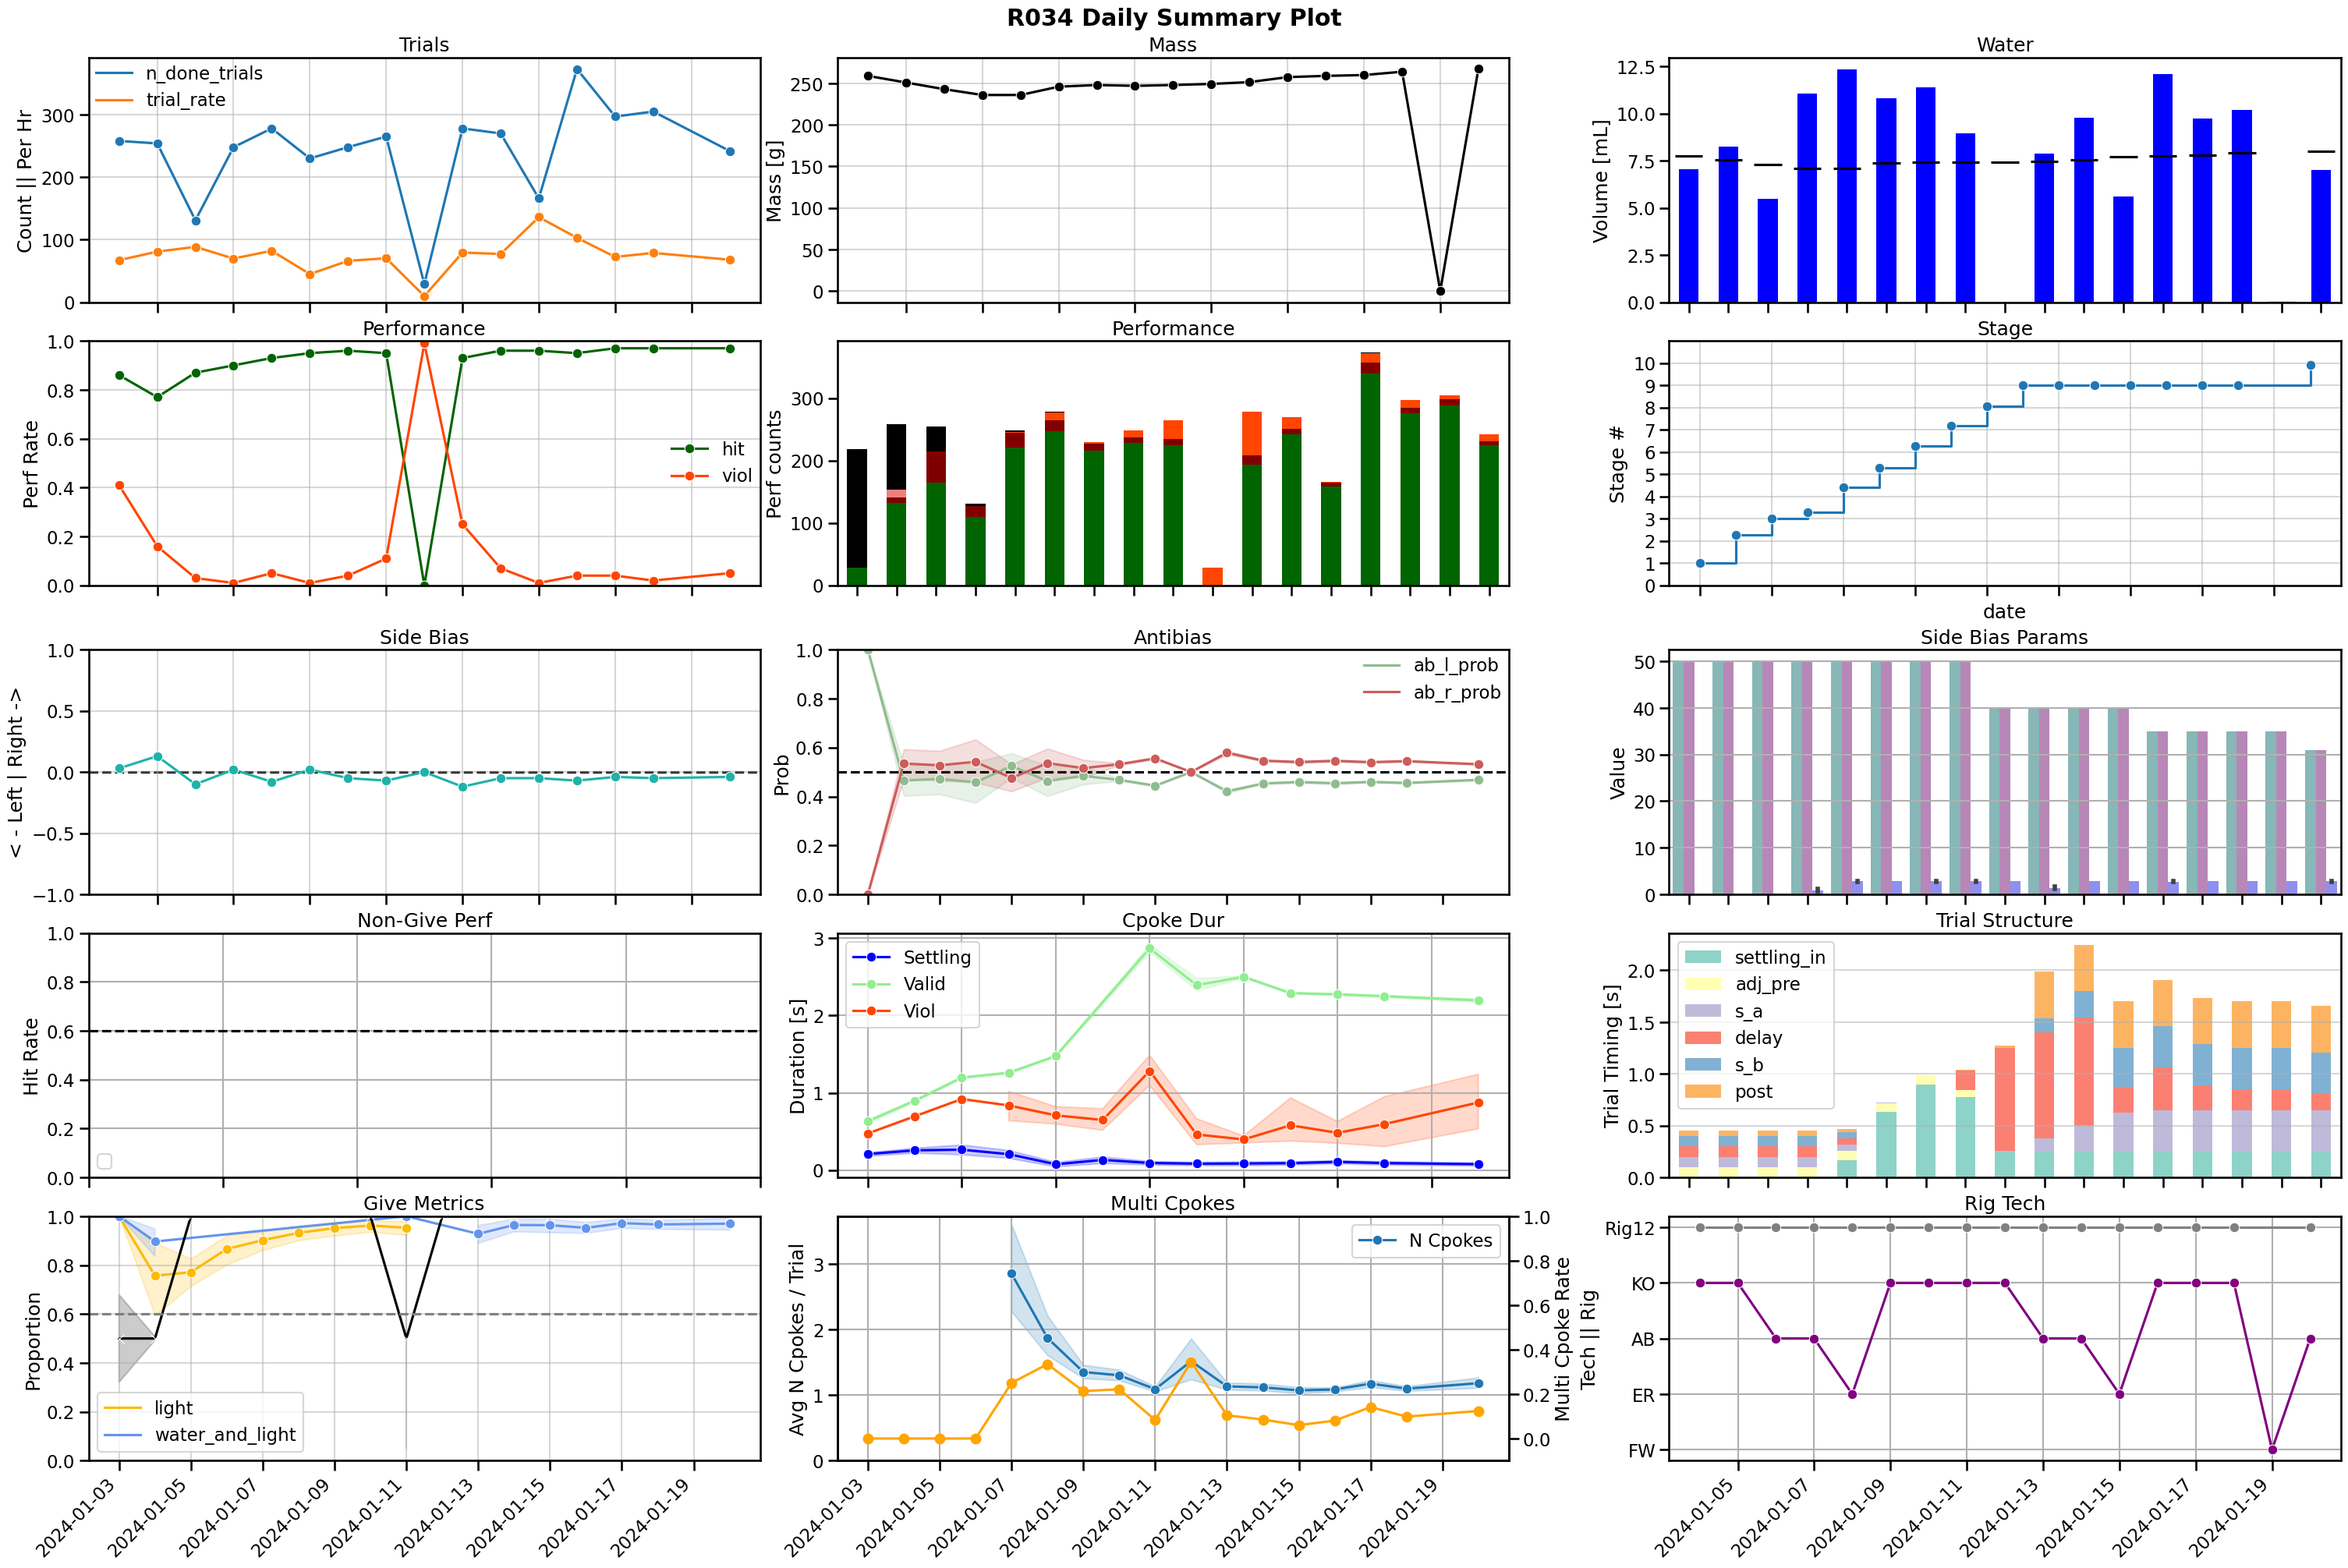

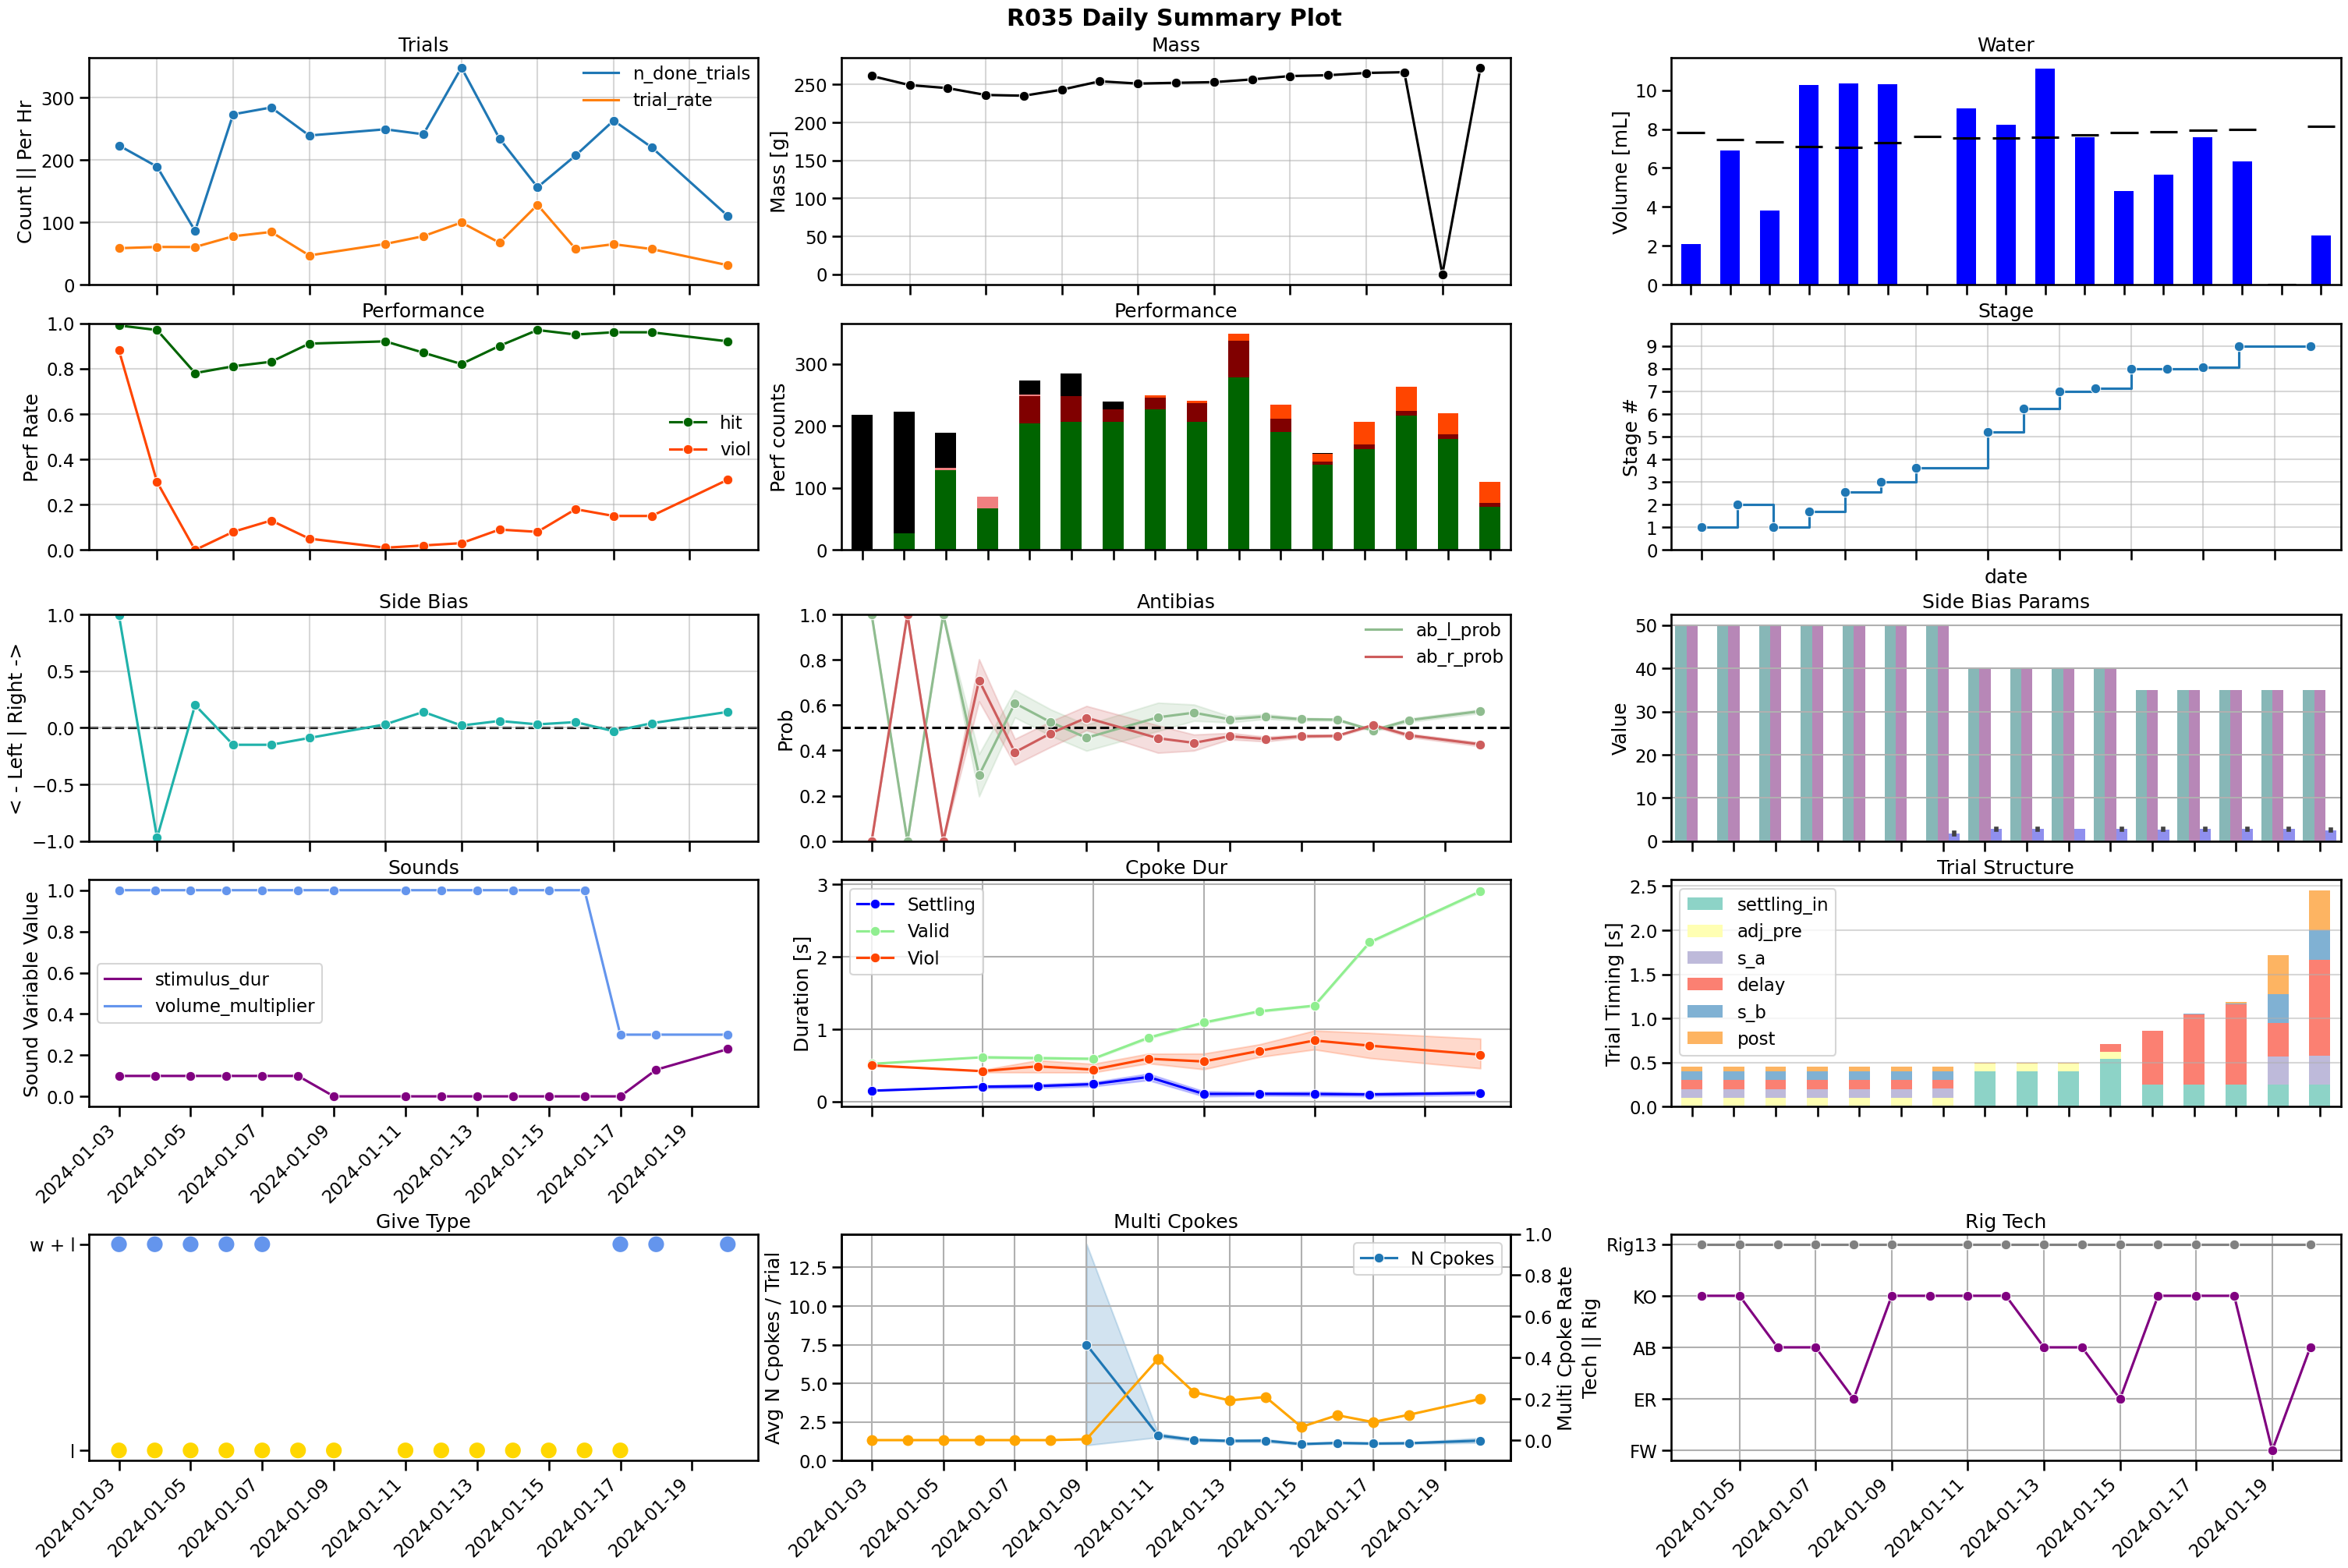

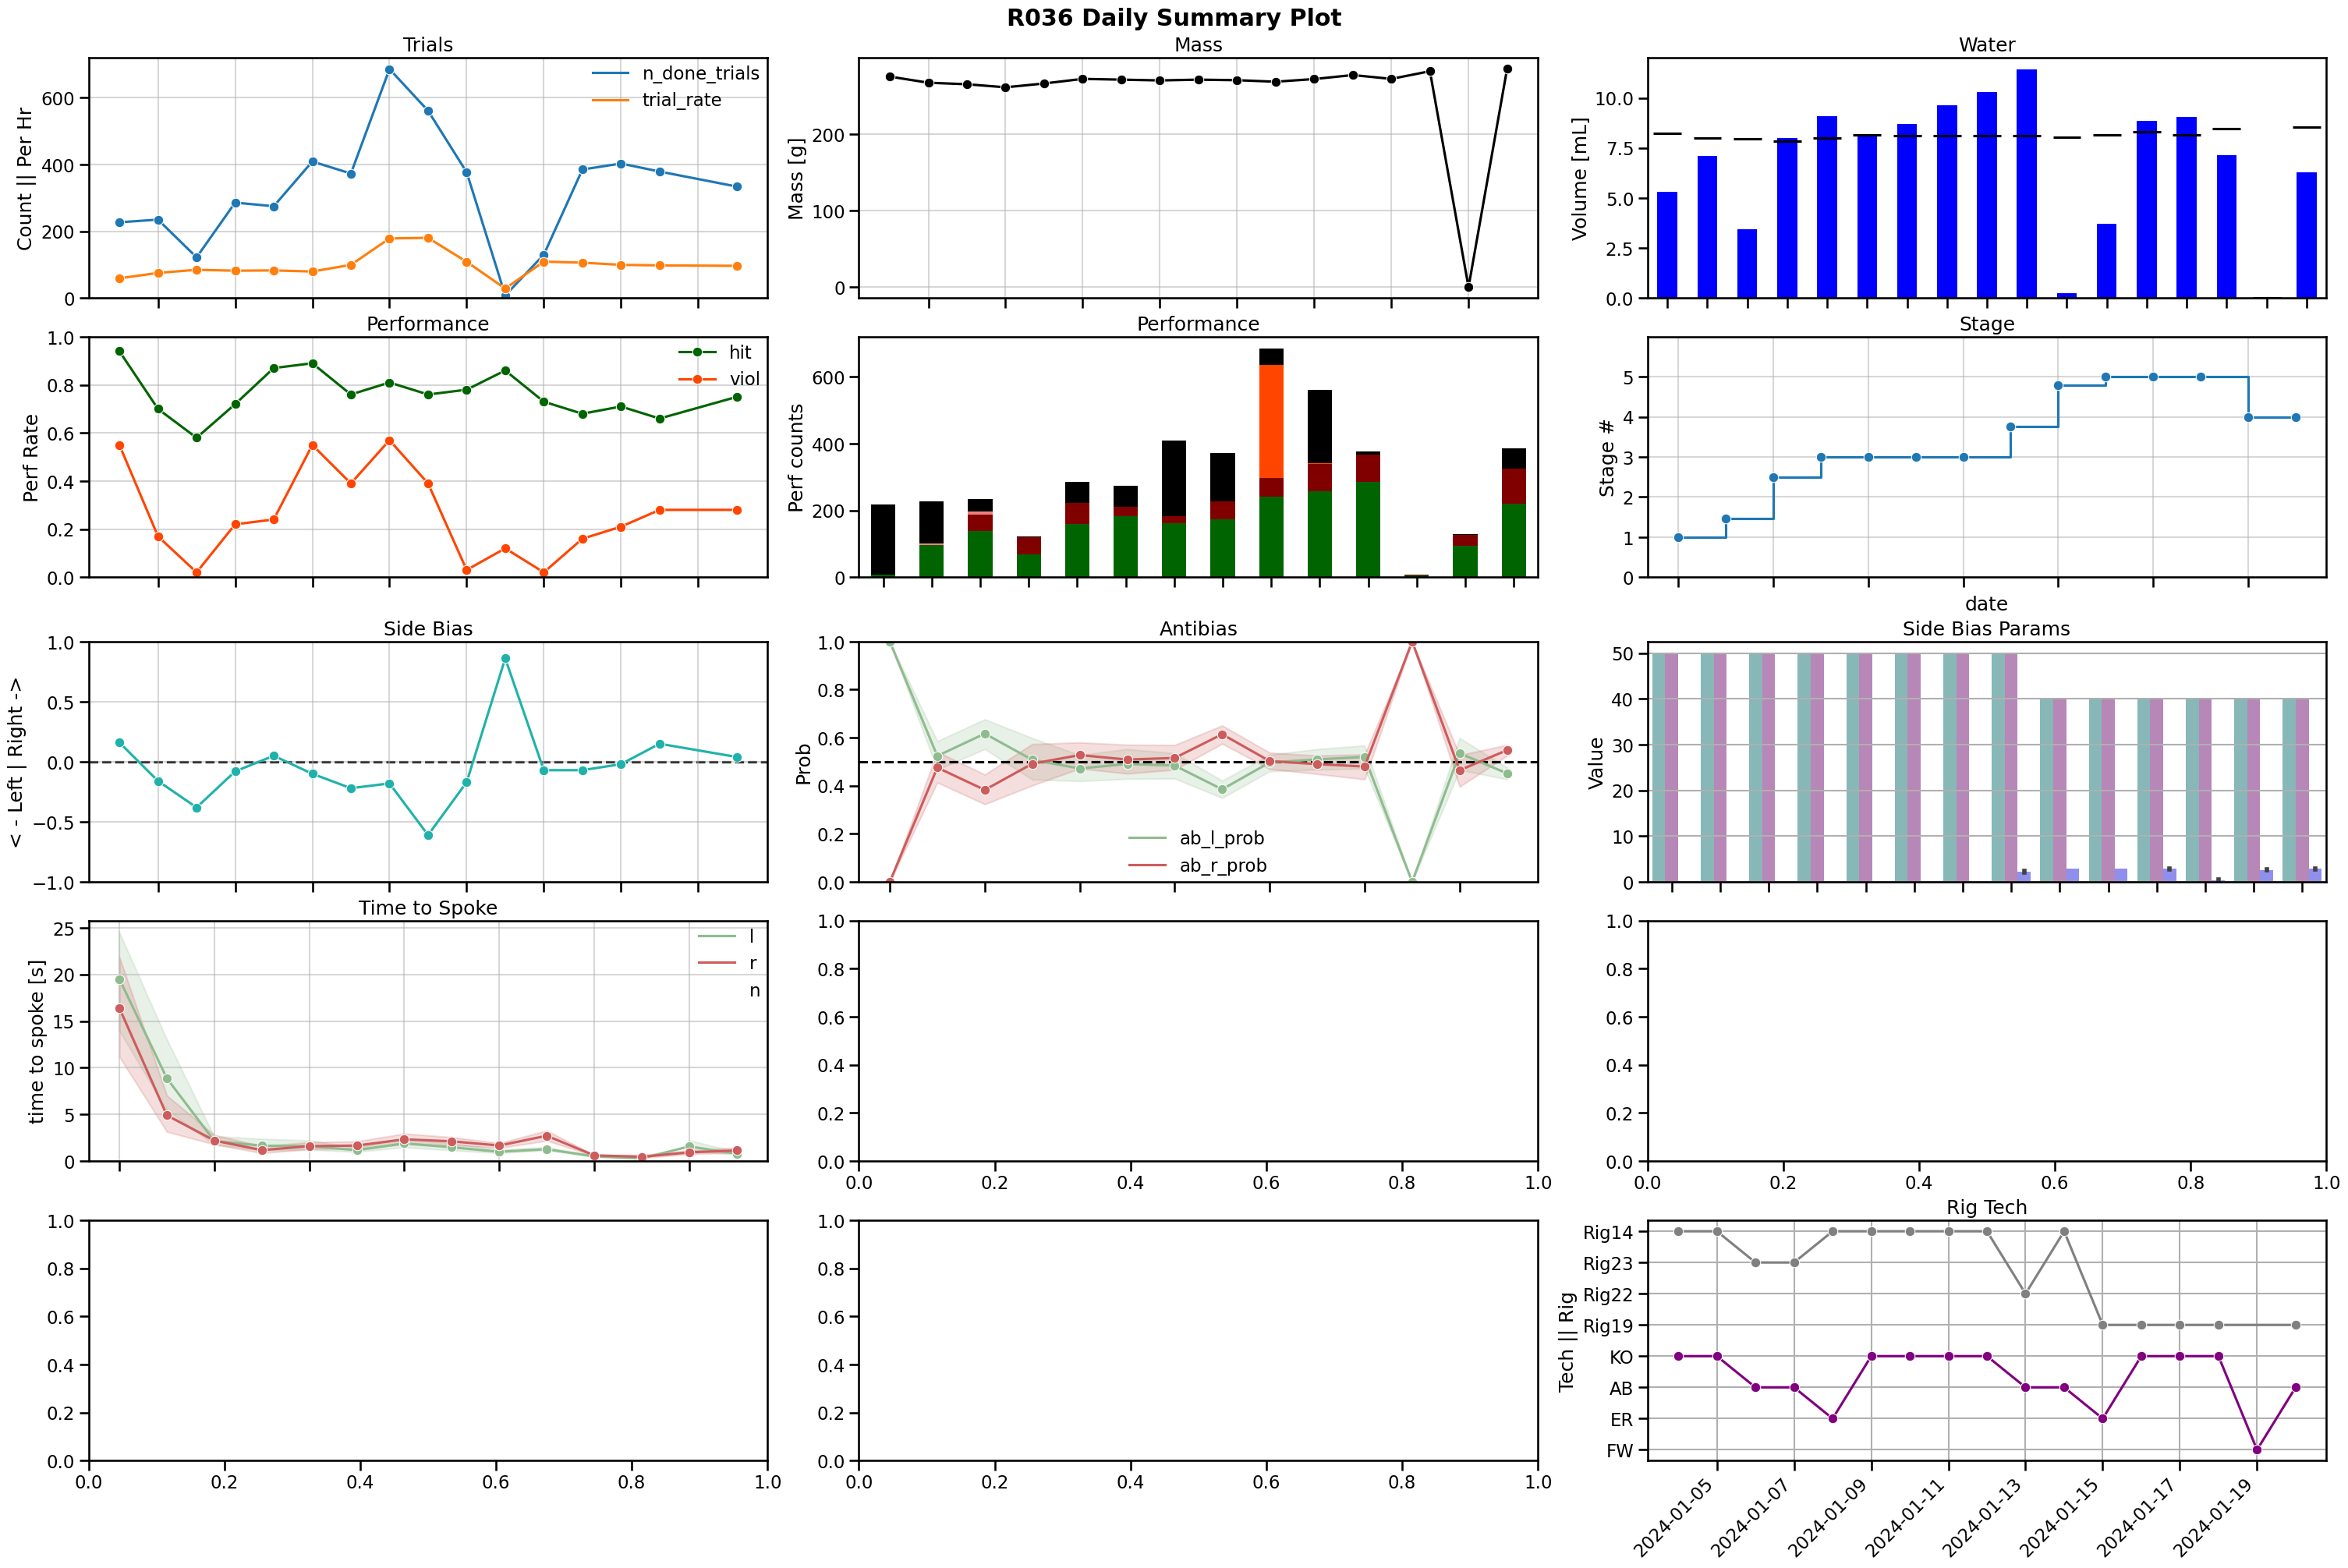

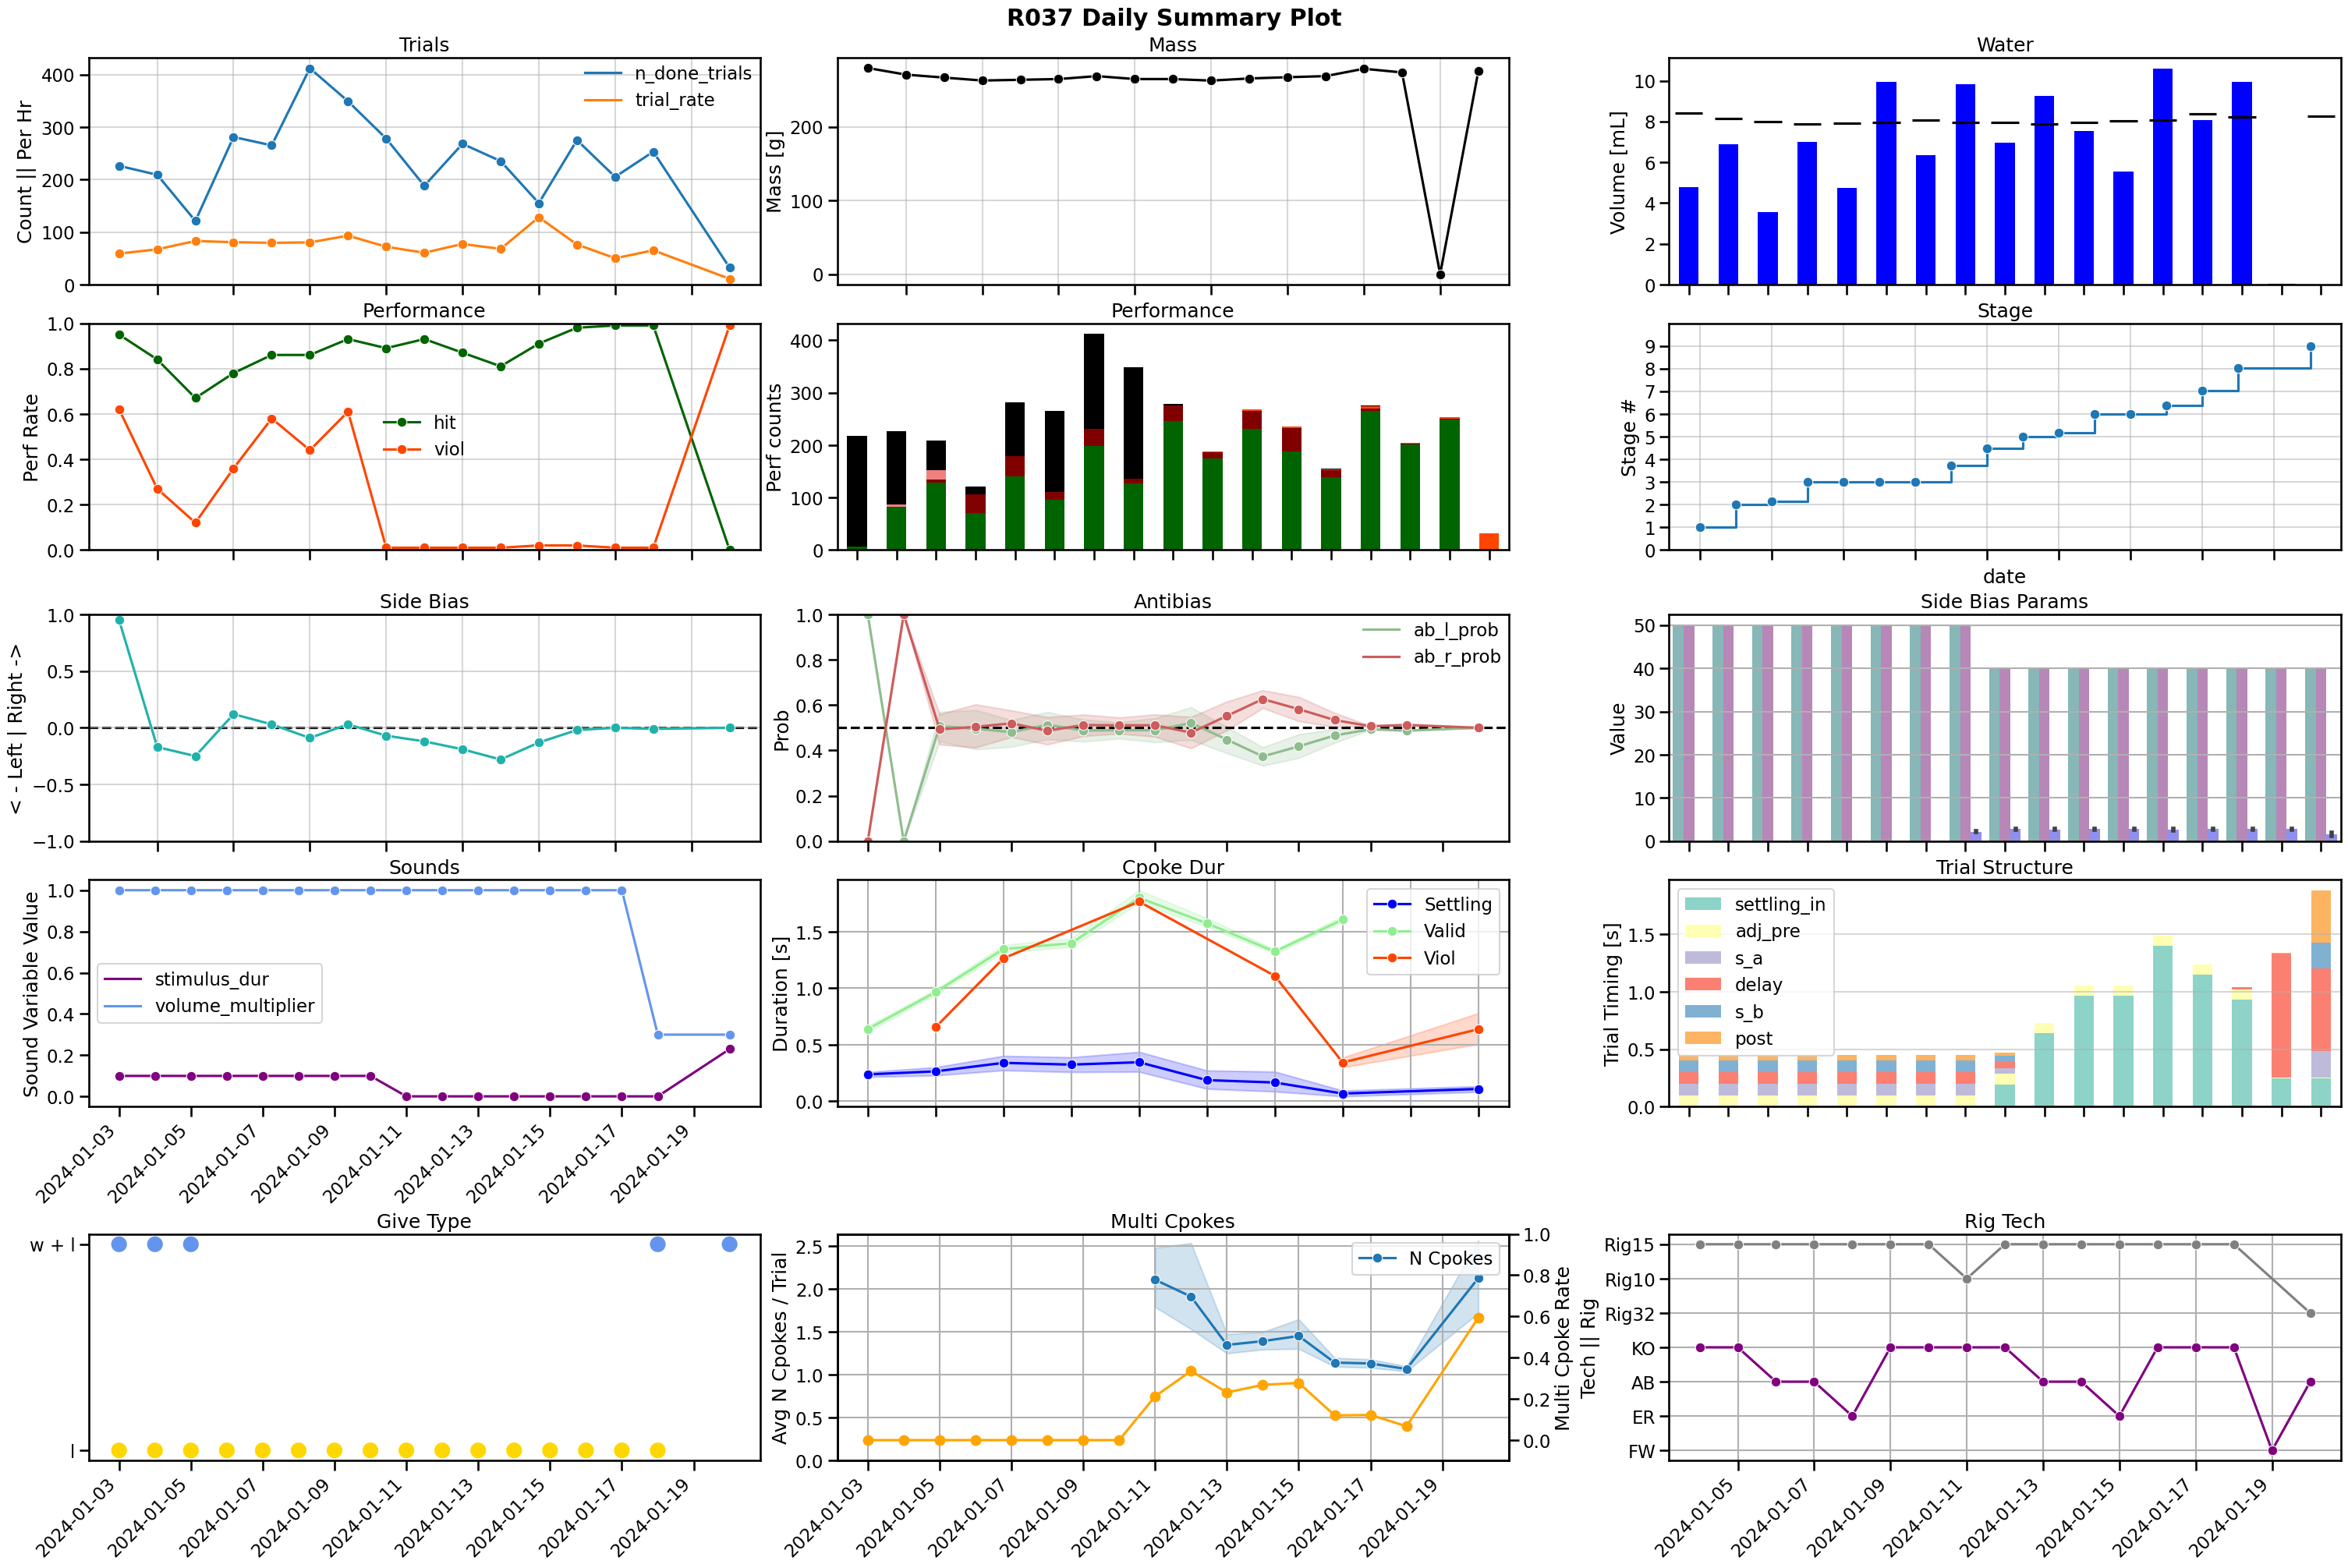

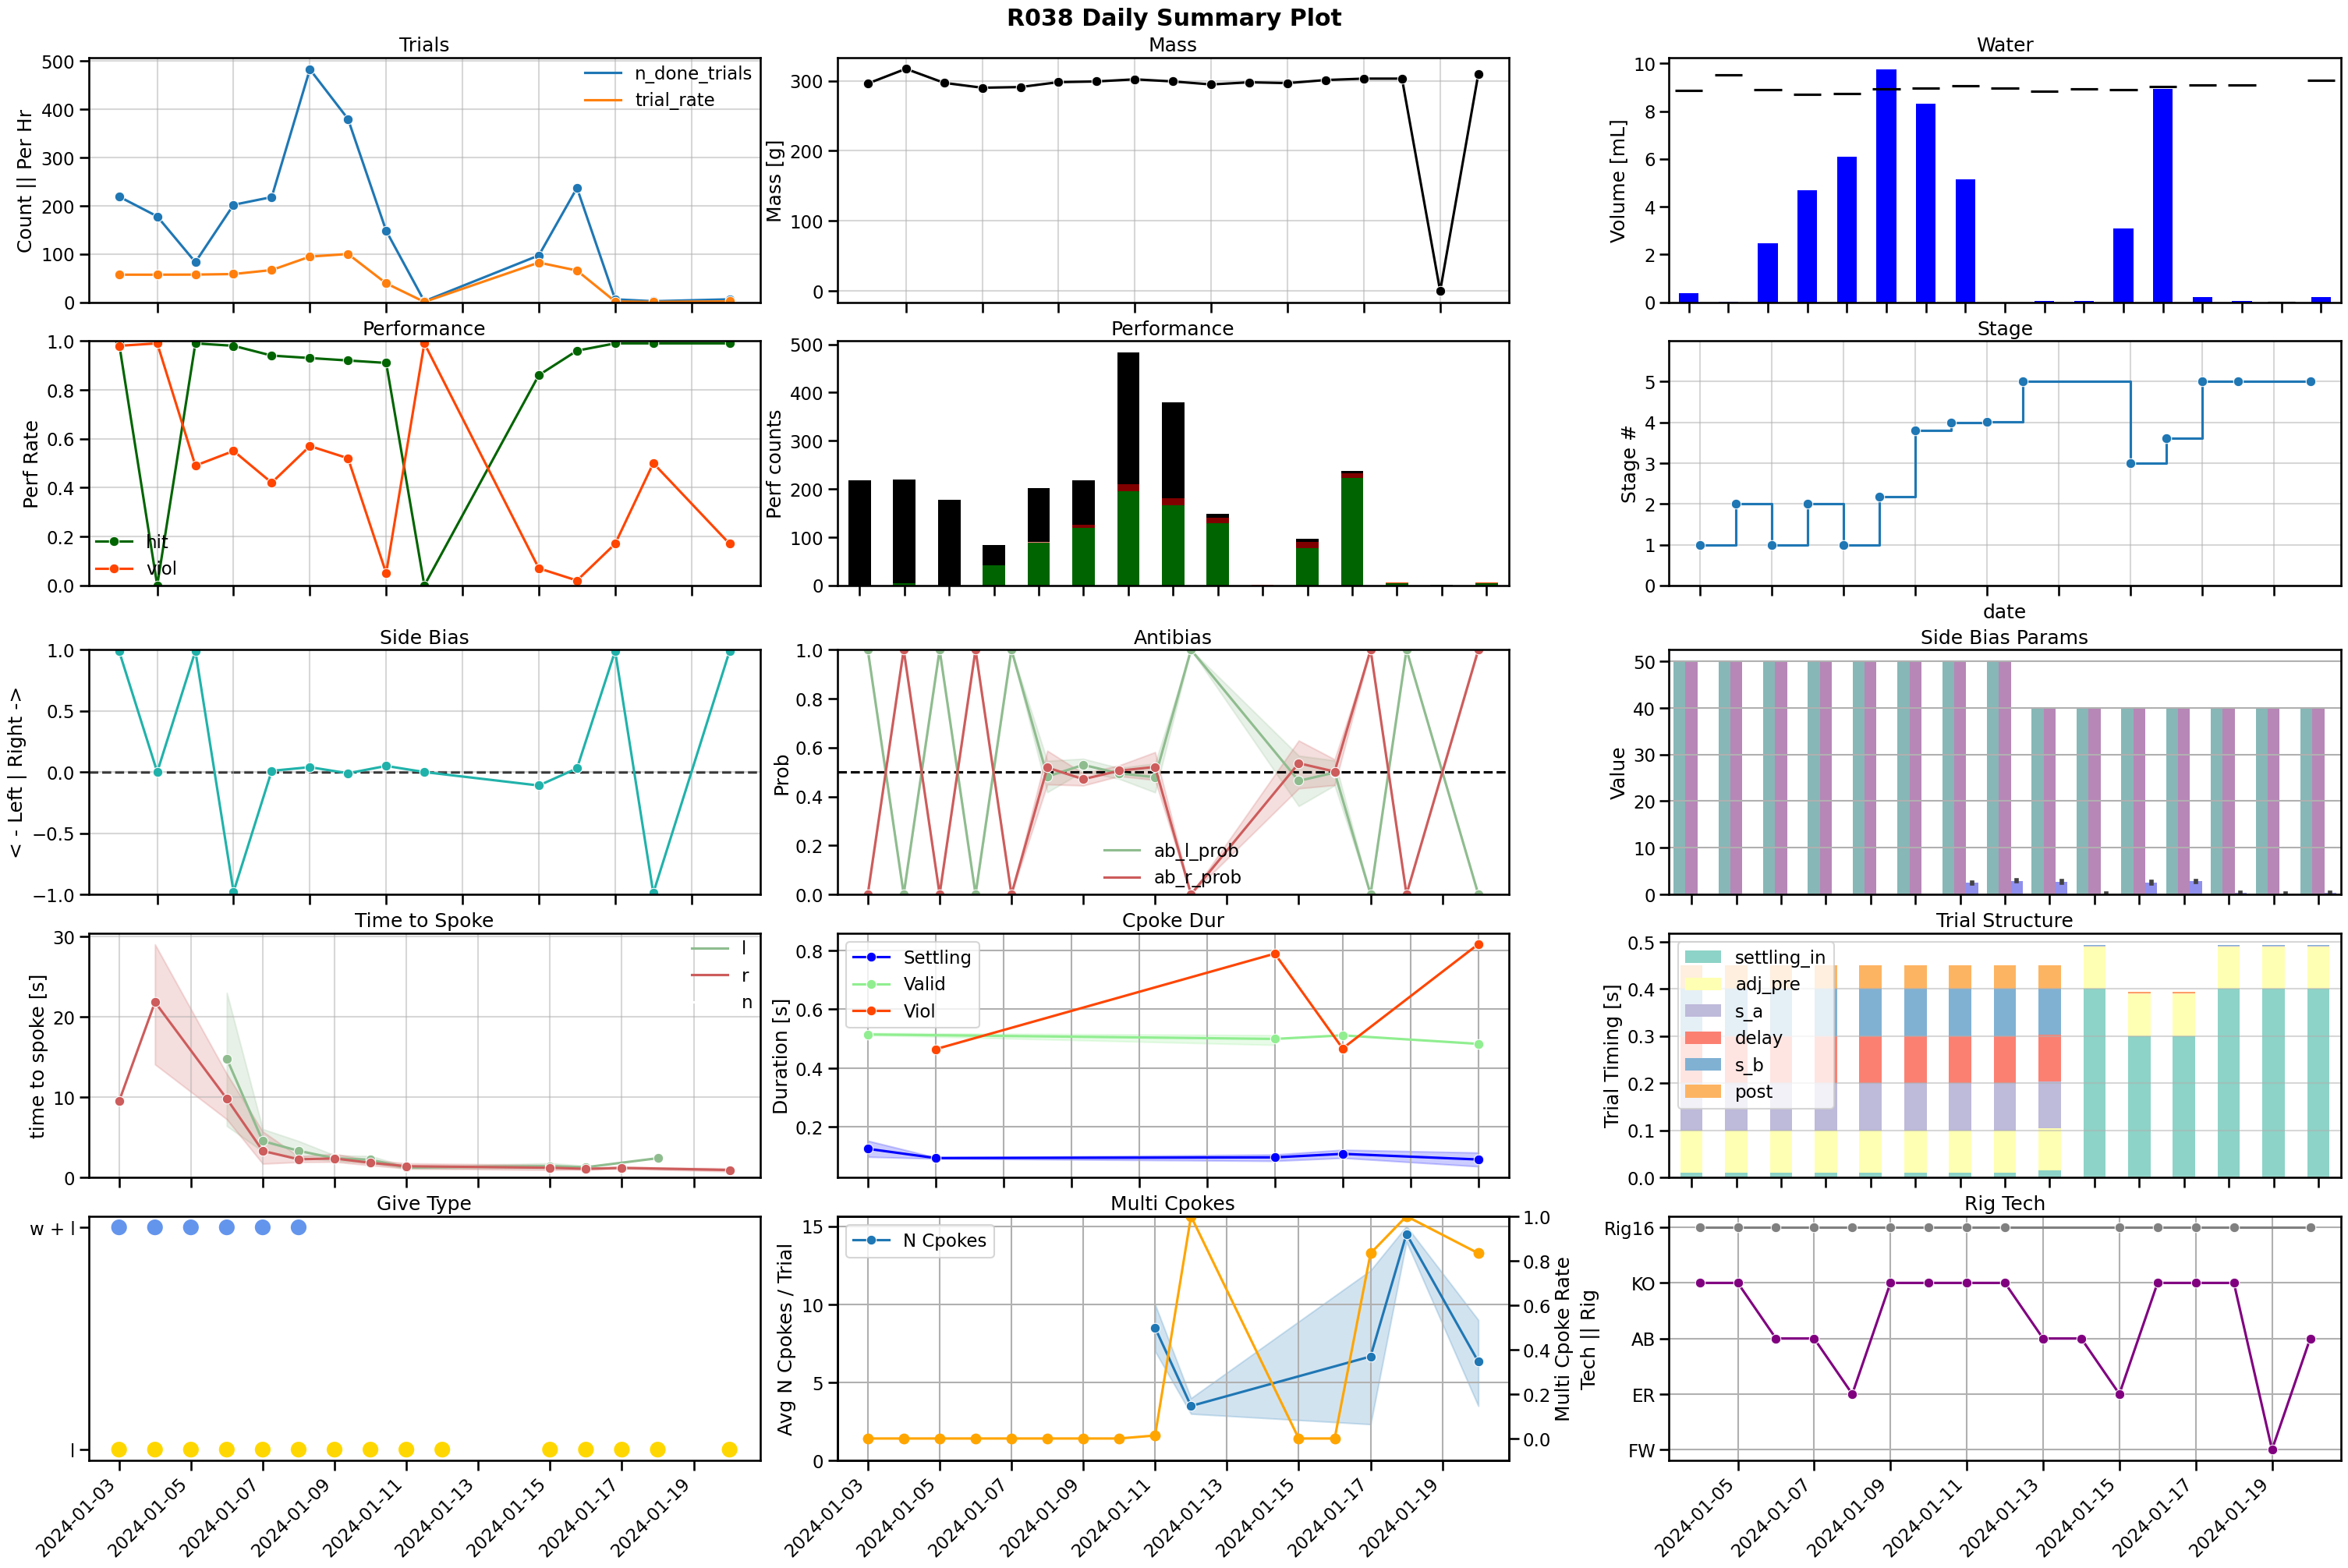

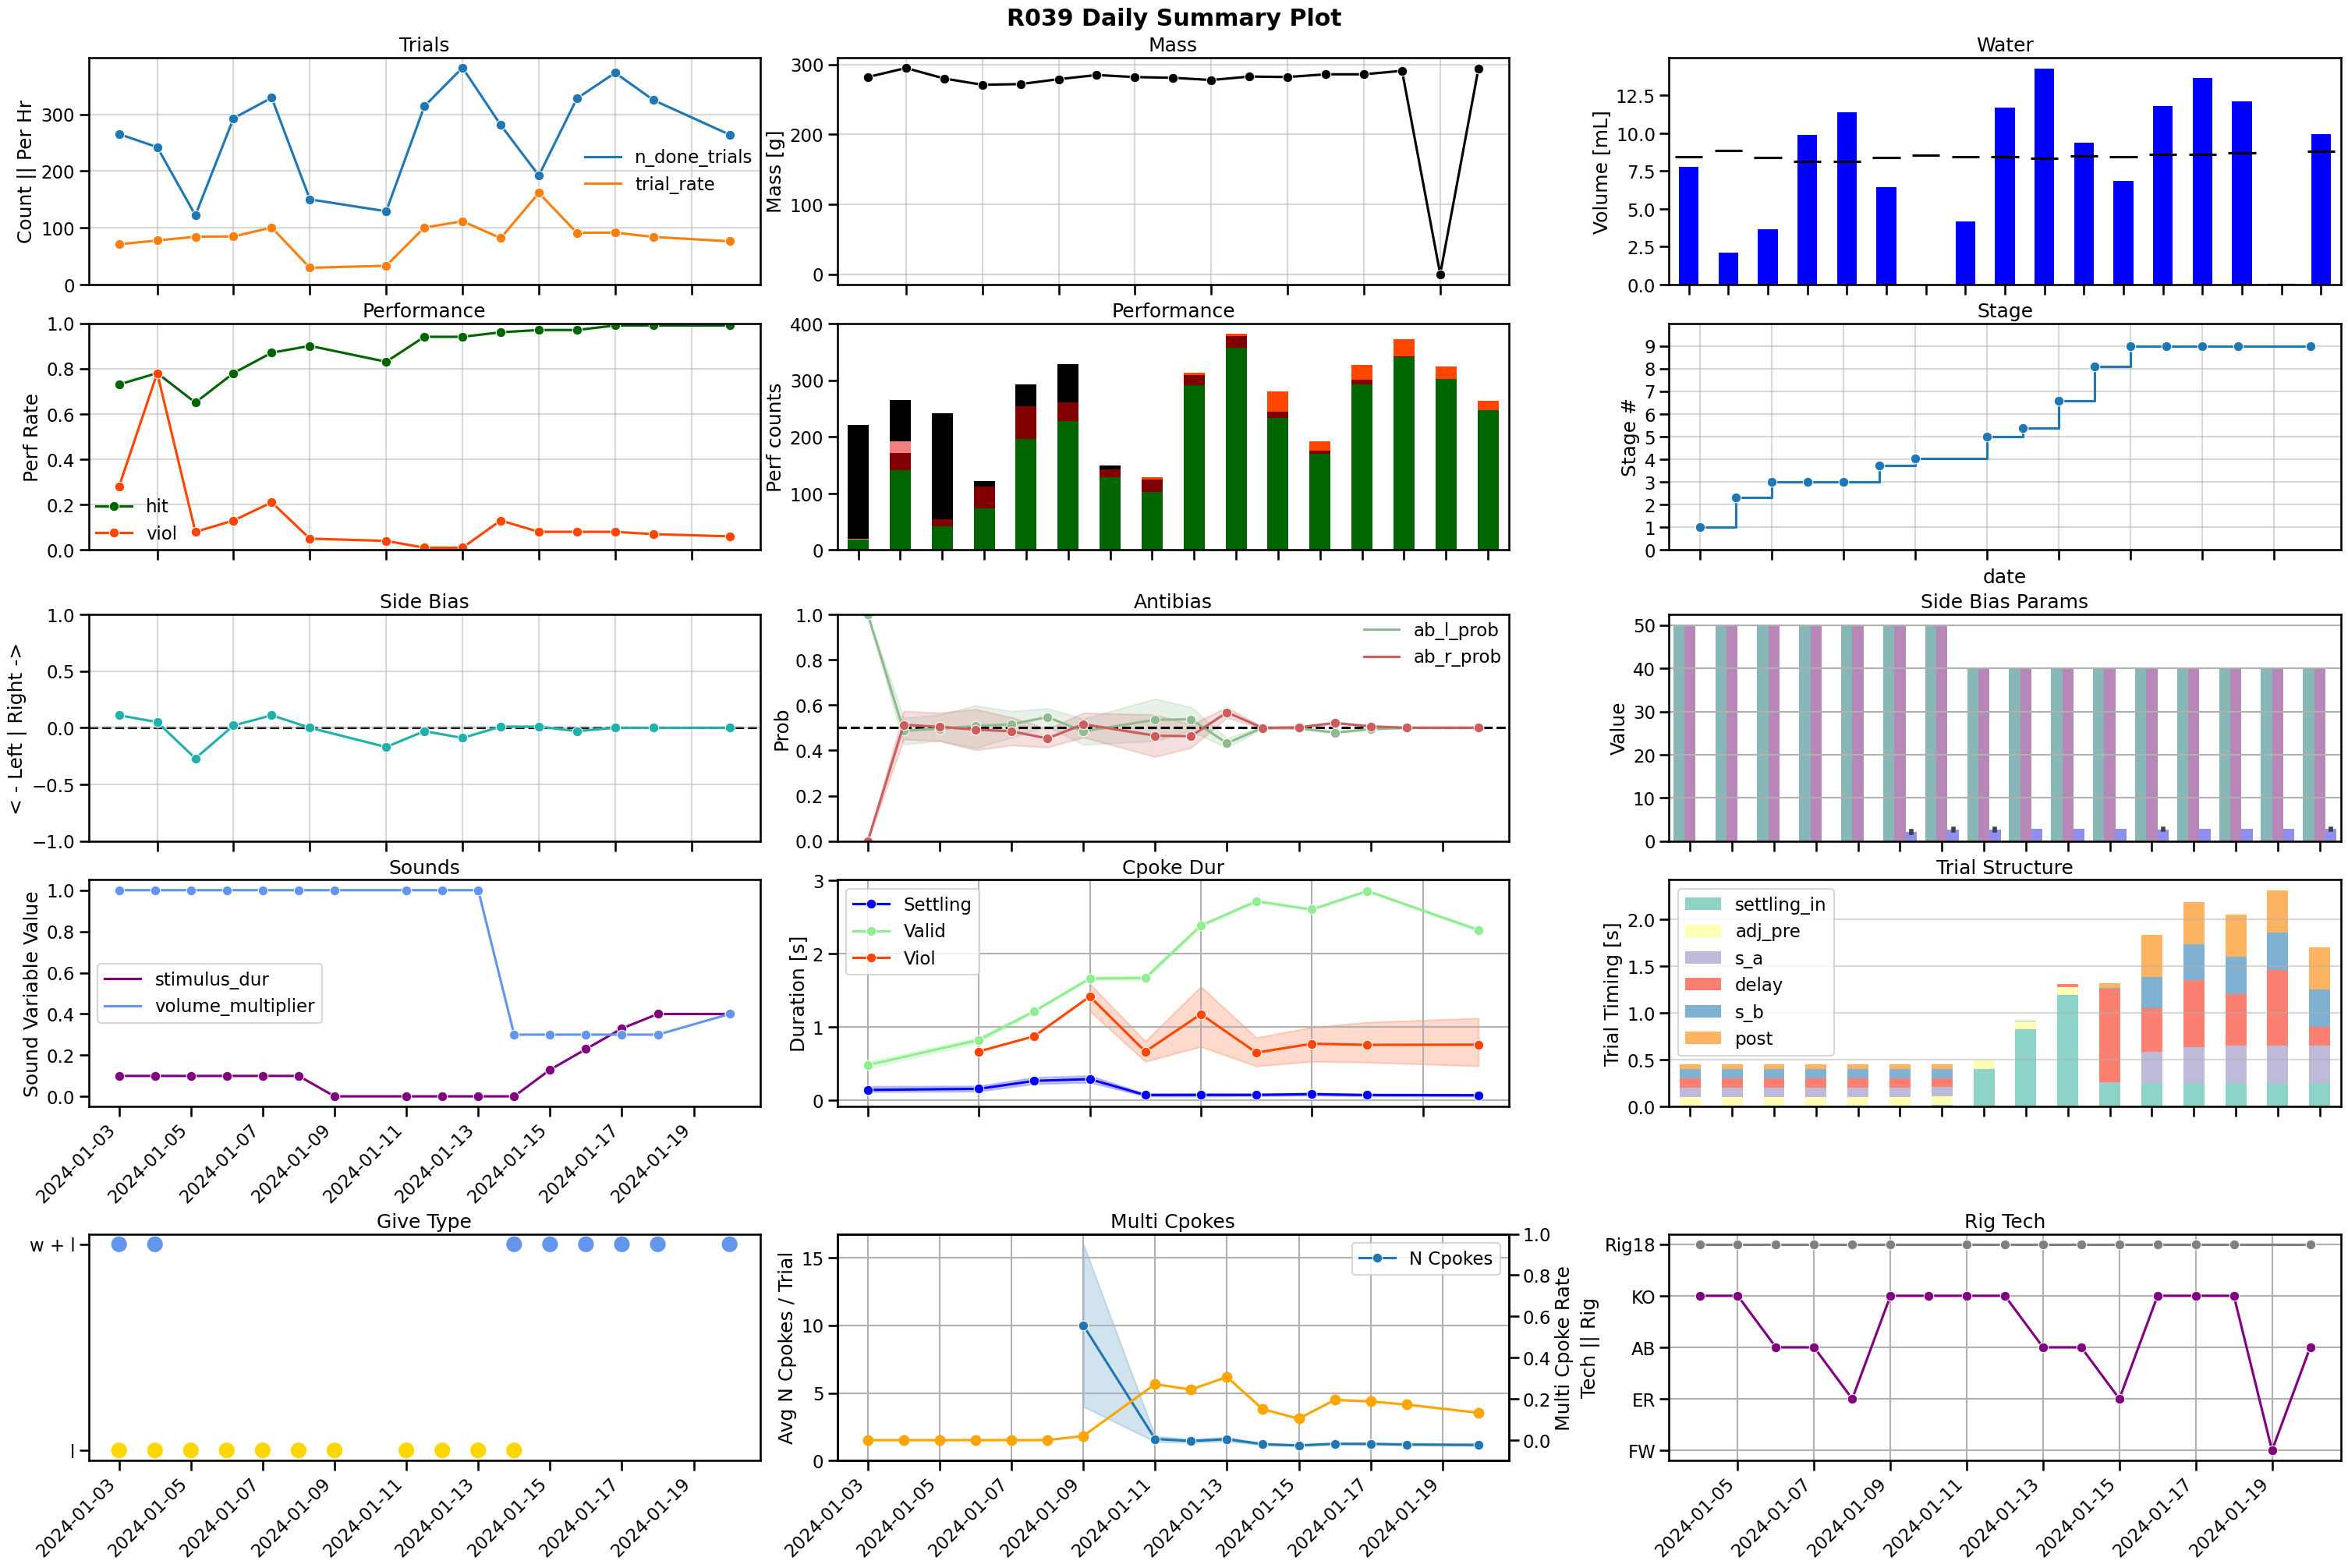

In [43]:
for animal_id, animal_days_df in days_df.groupby("animal_id"):
    animal_trials_df = trials_df.query("animal_id == @animal_id")
    multiplot_multi_day_summary(
        animal_id, animal_days_df, animal_trials_df.reset_index()
    )
    print(animal_id)

In [45]:
# PLOT TRIALS DATA
multiplot_single_day_summaries(
    trials_df, figures_path=FIGURES_PATH, save_out=True, overwrite=False
)

making R034_2024-01-11_day_summary
in cpoke stage but doesn't fit plot logic!
making R039_2024-01-14_day_summary
in cpoke stage but doesn't fit plot logic!
making R032_2024-01-16_day_summary
in cpoke stage but doesn't fit plot logic!
making R035_2024-01-17_day_summary
in cpoke stage but doesn't fit plot logic!
making R037_2024-01-18_day_summary
in cpoke stage but doesn't fit plot logic!
making R038_2024-01-20_day_summary
making R039_2024-01-20_day_summary
['s_a', 'delay', 's_b', 'go']
